# PROJET 4 : ANTICIPEZ LES BESOINS EN CONSOMMATION ÉLECTRIQUE DE BÂTIMENTS

## 0 - PRÉALABLES :

### A - Importation des librairies :

In [1]:
# Importation des librairies :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

### B - Importation des fichiers :

In [2]:
# Importation du fichier :
data_2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
data_2016 = pd.read_csv("2016-building-energy-benchmarking.csv")

## I - NETTOYAGE DES JEUX DE DONNÉES :

### A - Aperçu des deux datasets :

#### 1) Aperçu du jeu de données de 2015 :

In [3]:
# Aperçu du jeu de données de 2015 : 
data_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [4]:
# Taille du jeu de données de 2015 :
data_2015.shape

(3340, 47)

In [5]:
# Liste des variables du jeu de données de 2015 :
data_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

#### 2) Aperçu du jeu de données de 2016 :

In [6]:
# Aperçu du jeu de données de 2016 :
data_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [7]:
# Taille du jeu de données de 2016 :
data_2016.shape

(3376, 46)

In [8]:
# Liste des variables du jeu de données de 2016 :
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

#### 3) Conclusion :

### B - Concaténation des deux datasets :

#### 1) Variables différentes entre les deux datasets :

In [9]:
# Liste des variables absentes dans le dataset 2015 :
set(data_2016.columns) - set(data_2015.columns)

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [10]:
# Liste des variables absentes dans le dataset 2016 :
set(data_2015.columns) - set(data_2016.columns)

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

#### 2) Correction des variables identiques aux noms différents :

In [11]:
# Harmonisation des noms des variables :
data_2016.rename(columns={"ZipCode":"Zip Codes", 
                  "GHGEmissionsIntensity" : "GHGEmissionsIntensity(kgCO2e/ft2)",
                  "TotalGHGEmissions" : "GHGEmissions(MetricTonsCO2e)",
                  "Comments" : "Comment"}, inplace=True)

#### 3) Correction de la variable "Location" (= latitude + longitude + address + city + state) :

In [12]:
# Aperçu de la variable "Location" du dataset de 2015
data_2015["Location"][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

On s'aperçoit que la variable "Location" du jeu de données de 2015 regroupe 5 variables différentes du dataset de 2016, à savoir "latitude", "longitude", "address", "city" et "state". Le plus simple semble être de supprimer cette variable et de faire une jointure des cinq variables de localisation de 2016 sur le dataset de 2015.

In [13]:
# Harmonisation des variables de localisation :
data_2015.drop(columns="Location",inplace=True)
location = data_2016[["OSEBuildingID","Address","City","Latitude","Longitude","State"]]
data_2015 = pd.merge(data_2015, location, on="OSEBuildingID")
del(location)

#### 4) Suppression des cinq dernières variables spécifiques à 2015 :

In [14]:
# Suppression des 6 variables inutiles :
data_2015.drop(columns=["2010 Census Tracts","City Council Districts",
                        "OtherFuelUse(kBtu)","SPD Beats",
                        "Seattle Police Department Micro Community Policing Plan Areas"],inplace=True)

#### 5) Regroupement des deux jeux de données :

In [15]:
# Concaténation des deux dataframes :
data = pd.concat([data_2015, data_2016])

In [16]:
# Aperçu du dataframe obtenu :
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comment,ComplianceStatus,Outlier,Zip Codes,Address,City,Latitude,Longitude,State
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,No,NaN,Compliant,NaN,18081.0,405 Olive way,Seattle,47.61220,-122.33799,WA
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,No,NaN,Compliant,NaN,18081.0,724 Pine street,Seattle,47.61317,-122.33393,WA
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,Yes,NaN,Compliant,NaN,18081.0,1900 5th Avenue,Seattle,47.61393,-122.33810,WA
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,No,NaN,Compliant,High Outlier,18081.0,620 STEWART ST,Seattle,47.61412,-122.33664,WA
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,No,NaN,Compliant,NaN,19576.0,401 LENORA ST,Seattle,47.61375,-122.34047,WA


### C) Nettoyage des valeurs manquantes :

#### 1) Suppression des variables inutiles :

In [17]:
# Suppression des variables inutiles :
data.drop(columns=["State", "City", "ListOfAllPropertyUseTypes","Comment","ComplianceStatus","DefaultData"], inplace=True)

#### 2) Suppression des variables incomplètes :

<AxesSubplot:>

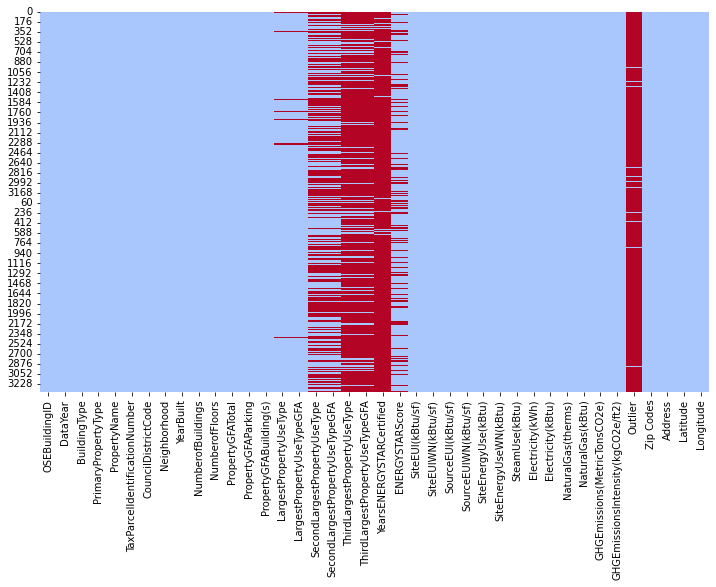

In [18]:
# Aperçu du volume d'informations manquantes :
plt.figure(figsize=(12,7))
sns.heatmap(data.isna(),cbar=False, cmap="coolwarm", center=0.25)

In [19]:
# Suppression de la variable "YearsENERGYSTARCertified" car trop incomplète :
data.drop(columns=["YearsENERGYSTARCertified"], inplace=True)

In [20]:
# Suppression des outliers :
data = data.loc[~(data["Outlier"]=="High Outlier") | 
         (data["Outlier"]=="High outlier") | 
         (data["Outlier"]=="Low Outlier") |
         (data["Outlier"]=="Low outlier")]

In [21]:
# Suppression de la variable "Outlier" :
data.drop(columns=["Outlier"], inplace=True)

<AxesSubplot:>

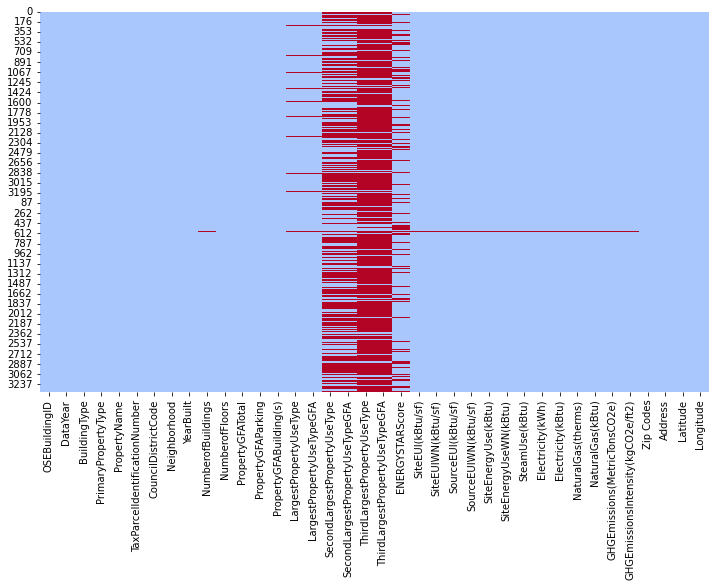

In [22]:
# Aperçu du volume d'informations manquantes :
plt.figure(figsize=(12,7))
sns.heatmap(data.isna(),cbar=False, cmap="coolwarm", center=0.25)

#### 3) Suppression des lignes incomplètes et des doublons :

In [23]:
# Affichage des doublons :
data[data["DataYear"]==2015].duplicated("OSEBuildingID").sum()
data[data["DataYear"]==2016].duplicated("OSEBuildingID").sum()

0

In [24]:
# Définition du pourcentage de valeurs manquantes par ligne :
nan_raws = data.isna().sum(axis=1)/data.shape[1]

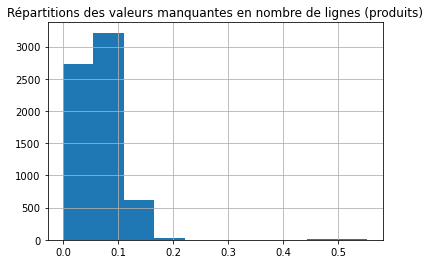

In [25]:
# Histogramme des valeurs manquantes :
plt.figure()
nan_raws.hist()
plt.title("Répartitions des valeurs manquantes en nombre de lignes (produits)")
plt.show()

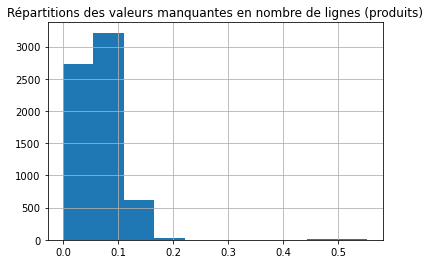

In [26]:
# Histogramme des valeurs manquantes :
plt.figure()
nan_raws.hist()
plt.title("Répartitions des valeurs manquantes en nombre de lignes (produits)")
plt.show()

In [27]:
# Nombre de produits comportant plus de 9% de valeurs manquantes :
nan_raws[nan_raws > 0.09].count()

3426

In [28]:
# Nombre de produits comportant plus de 8% de valeurs manquantes :
nan_raws[nan_raws > 0.08].count()

3426

In [29]:
# Nombre de produits comportant plus de 8% de valeurs manquantes :
nan_raws[nan_raws > 0.35].count()

18

In [30]:
# Suppression des lignes comptant plus de 33% de valeurs manquantes :
data = data[data.isna().sum(axis=1)/data.shape[1] < 0.35]

In [31]:
# Suppression de nan_raws :
del(nan_raws)

### D - Traitement des variables :

#### 1) "BuildingType" :

In [32]:
# différentes valeurs de la variable :
data.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

La variable ne semble par comporter d'anomalies. En revanche, la mission concerne uniquement aux "bâtiments non destinés à l'habitation". On peut donc d'ores et déjà supprimer les 3330 propriétés résidentielles.

In [33]:
# Suppression des bâtiments destinés à l'habitation :
data = data[data["BuildingType"].str.contains("Multifamily") == False]

#### 2) "PrimaryPropertyType" :

In [34]:
# Nombre d'occurences par valeurs :
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    576
Other                          495
Large Office                   334
K-12 School                    268
Mixed Use Property             218
Warehouse                      187
Retail Store                   186
Non-Refrigerated Warehouse     185
Hotel                          148
Worship Facility               142
Medical Office                  79
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
Residence Hall                  21
College/University              21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      13
Laboratory                      11
Restaurant\n                     9
Low-Rise Multifamily             5
SPS-District K-12   

In [35]:
# Correction de valeurs :
data["PrimaryPropertyType"].replace({"Self-Storage Facility\n" : "Self-Storage Facility",
                                     "Distribution Center\n" : "Distribution Center", 
                                     "Restaurant\n" : "Restaurant", 
                                     "Office" : "Small- and Mid-Sized Office", 
                                     "Supermarket / Grocery Store" : "Supermarket/Grocery Store", 
                                     "Non-Refrigerated Warehouse" : "Warehouse",
                                     "Residence Hall/Dormitory" : "Residence Hall",
                                     "SPS-District K-12" : "K-12 School",
                                     "College/University" : "University"}, inplace=True)

In [36]:
# Suppression des immeubles d'habitations restants  :
data = data.loc[data["PrimaryPropertyType"]!="Low-Rise Multifamily"]

#### 3) PropertyName :

In [37]:
# Aperçu de la variable :
data["PropertyName"]

0                      MAYFLOWER PARK HOTEL
1                           PARAMOUNT HOTEL
2                              WESTIN HOTEL
4                     WARWICK SEATTLE HOTEL
5            WEST PRECINCT (SEATTLE POLICE)
                       ...                 
3371                  Horticulture building
3372    International district/Chinatown CC
3373                        Queen Anne Pool
3374            South Park Community Center
3375            Van Asselt Community Center
Name: PropertyName, Length: 3261, dtype: object

In [38]:
# Nombre de noms de propriété dupliqués :
data["PropertyName"].duplicated().sum()

110

In [39]:
# Récupération des noms de bâtiments de 2016
property2016 = data[data["DataYear"]==2016]
property2016 = property2016[["OSEBuildingID","PropertyName"]]

# Uniformisation des noms de bâtiments :
data = pd.merge(data, property2016, on="OSEBuildingID")
data["PropertyName_x"] = data["PropertyName_y"]
data.drop(columns="PropertyName_y", inplace=True)
data.rename(columns={"PropertyName_x":"PropertyName"}, inplace=True)
data["PropertyName"] = data["PropertyName"].str.title()
del(property2016)

In [40]:
# Nombre de noms de propriété dupliqués :
data["PropertyName"].duplicated().sum()

1600

#### 4) TaxParcelIdentificationNumber :

In [41]:
# Vérification du numéro fiscal sur un même bâtiment : 
data[data["PropertyName"].str.contains("Mayflower")]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
0,1,2015,NonResidential,Hotel,Mayflower Park Hotel,659000030,7,DOWNTOWN,1927,1.0,...,1080307.00,3686160.0,12724.0000,1272388.0,249.43,2.64,18081.0,405 Olive way,47.6122,-122.33799
1,1,2016,NonResidential,Hotel,Mayflower Park Hotel,0659000030,7,DOWNTOWN,1927,1.0,...,1156514.25,3946027.0,12764.5293,1276453.0,249.98,2.83,98101.0,405 Olive way,47.6122,-122.33799


In [42]:
# Nombre de numéros fiscaux dupliqués :
data["TaxParcelIdentificationNumber"].duplicated().sum()

1461

In [43]:
# Harmonisation de l'écriture des numéros fiscaux :
data["NbrChiffres"] = data["TaxParcelIdentificationNumber"].astype(str)
data["NbrChiffres"] = data["NbrChiffres"].str.len()

In [44]:
# Différents nombres de chiffres :
data["NbrChiffres"].unique()

array([ 9, 10,  7,  8, 25,  3, 11], dtype=int64)

In [45]:
# Affichage des numéraux fiscaux à 25 chiffres :
data[data["NbrChiffres"]==25]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude,NbrChiffres
3088,40348,2015,NonResidential,Retail Store,Broadway Market,6850700316 and 6850700315,3,EAST,1916,1.0,...,13325914.0,2607.000000,260710.0,106.74,0.35,18376.0,401 Broadway E,47.62256,-122.32092,25
3089,40348,2016,NonResidential,Mixed Use Property,Broadway Market,6850700316 and 6850700315,3,EAST,1916,1.0,...,2554939.0,2079.069824,207907.0,28.85,0.20,98102.0,401 Broadway E,47.62256,-122.32092,25


In [46]:
# Affichage des numéros fiscaux à 11 chiffres
data[data["NbrChiffres"]==11]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude,NbrChiffres
3124,49737,2015,NonResidential,Retail Store,Marqueen / Mqh,701100-0000,7,MAGNOLIA / QUEEN ANNE,1918,1.0,...,1452219.0,22268.00000,2226780.0,128.39,2.79,18390.0,600 Queen Anne Ave N,47.62503,-122.35642,11
3125,49737,2016,NonResidential,Retail Store,Marqueen / Mqh,701100-0000,7,MAGNOLIA / QUEEN ANNE,1918,1.0,...,1343774.0,25427.71094,2542771.0,144.41,3.29,98109.0,600 Queen Anne Ave N,47.62503,-122.35642,11


In [47]:
# Affichage des numéros fiscaux à 8 chiffres
data[data["NbrChiffres"]==8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude,NbrChiffres
1246,19520,2015,NonResidential,Worship Facility,Woodland Park Methodist Church,91000085,6,NORTHWEST,1922,1.0,...,75200.0,6090.0,608959.0,32.87,1.55,18377.0,302 N. 78TH ST,47.68576,-122.35481,8


In [48]:
# Affichage des numéros fiscaux à 7 chiffres
data[data["NbrChiffres"]==7]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude,NbrChiffres
490,384,2015,NonResidential,Warehouse,Dawn Food Products,1800113,2,GREATER DUWAMISH,1977,1.0,...,365596.0,15040.0,1503994.0,82.43,0.63,18388.0,6901 fox ave south,47.54066,-122.33023,7
492,385,2015,NonResidential,Large Office,Skinner Building,2400002,7,DOWNTOWN,1927,1.0,...,10220876.0,0.0,0.0,266.18,0.69,18081.0,1326 5th Avenue,47.60932,-122.33388,7
494,386,2015,NonResidential,Large Office,Ibm-Cos,2400002,7,DOWNTOWN,1964,1.0,...,13565778.0,0.0,0.0,579.99,1.55,18081.0,1200 5th avenue,47.60842,-122.33305,7
496,387,2015,NonResidential,Large Office,Puget Sound Plaza,2400002,7,DOWNTOWN,1960,1.0,...,18193949.0,0.0,0.0,1088.20,3.38,18081.0,1325 4th Avenue,47.60869,-122.33588,7
498,388,2015,NonResidential,Large Office,Rainier Tower,2400003,7,DOWNTOWN,1976,1.0,...,56764764.0,0.0,0.0,395.71,0.24,18081.0,1301 5th Ave,47.60896,-122.33481,7
500,389,2015,NonResidential,Hotel,Fairmont Olympic Seattle,2400003,7,DOWNTOWN,1923,1.0,...,27671094.0,42172.0,4217186.0,2937.83,5.20,18081.0,411 University Street,47.60804,-122.33391,7
502,390,2015,NonResidential,Retail Store,Rainier Electronics Llc,3600052,2,SOUTHEAST,1980,1.0,...,10082790.0,14590.0,1458983.0,147.77,0.36,17919.0,2700 RAINIER AVE. S.,47.57936,-122.29744,7
504,391,2015,NonResidential,Mixed Use Property,Thaw Building,7400015,2,GREATER DUWAMISH,1970,1.0,...,4324760.0,21468.0,2146845.0,144.17,1.42,18800.0,8300 Military Rd South,47.52871,-122.29443,7
1086,764,2015,NonResidential,Large Office,Financial Center - Cos Compliance,2400002,7,DOWNTOWN,1970,1.0,...,32383179.0,0.0,0.0,225.75,0.18,18081.0,1215 4th Avenue,47.60765,-122.33480,7
1176,820,2015,SPS-District K-12,K-12 School,Bailey Gatzert Elementary,7600137,3,CENTRAL,1988,1.0,...,1907776.0,0.0,0.0,13.30,0.10,19578.0,1301 E. Yesler Way,47.60120,-122.31548,7


In [49]:
# Correction des numéraux fiscaux à 10 chiffres
data["TaxParcelIdentificationNumber"] = data["TaxParcelIdentificationNumber"].str.lstrip("0")
data.drop(columns=["NbrChiffres"], inplace=True)

#### 5) "CouncilDistrictCode" :

In [50]:
# différentes valeurs de la variable :
data["CouncilDistrictCode"].unique()

array([7, 3, 2, 4, 5, 6, 1], dtype=int64)

#### 6) "Neighborhood" :

In [51]:
# différentes valeurs de la variable :
data["Neighborhood"].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'Central',
       'NORTH', 'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Ballard',
       'North', 'Delridge', 'Northwest', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [52]:
# Harmonisation du format :
data["Neighborhood"] = data["Neighborhood"].str.title()

In [53]:
# Nombre d'individus par valeur :
data["Neighborhood"].value_counts()

Downtown                  713
Greater Duwamish          682
Magnolia / Queen Anne     293
Lake Union                285
Northeast                 238
East                      236
Northwest                 171
Ballard                   137
North                     131
Central                   109
Delridge                   91
Southeast                  90
Southwest                  81
Delridge Neighborhoods      1
Name: Neighborhood, dtype: int64

In [54]:
# Correction de Delridge Neighboroods :
data["Neighborhood"].replace("Delridge Neighborhoods","Delridge", inplace=True)

#### 7) "YearBuilt" :

In [55]:
# Aperçu de la variable :
data["YearBuilt"].sort_values()

896     1900
2682    1900
1315    1900
2646    1900
2645    1900
        ... 
3239    2015
3232    2015
3233    2015
3228    2015
3230    2015
Name: YearBuilt, Length: 3258, dtype: int64

La variable ne semble par comporter d'anomalies, si ce n'est qu'elle ne comporte aucune date de construction antérieure à 1900.

#### 8) "NumberofBuildings" :

In [56]:
# différentes valeurs de la variable :
data["NumberofBuildings"].unique()

array([  1.,   7.,   3.,   0.,   2.,   4.,  27.,   6.,  11.,  16.,  14.,
         9.,   5.,  39.,   8.,  23.,  10., 111.])

In [57]:
# Aperçu de la propriété qui comporte 111 bâtiments :
data[data["NumberofBuildings"]==111]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.0,0.0,11140.56,1.2,98105.0,NE 45th St & Brooklyn Ave,47.65644,-122.31041


In [58]:
# Remplacement de la valeur 0 par NaN :
data["NumberofBuildings"] = data["NumberofBuildings"].replace(0, np.NaN)

#### 9) "NumberofFloors" :

In [59]:
# différentes valeurs de la variable :
data["NumberofFloors"].unique()

array([12., 11., 41., 18.,  2.,  8., 15., 25.,  9., 33.,  6., 28.,  5.,
       10., 19.,  7.,  1.,  3.,  4., 24., 20., 34.,  0., 16., 23., 17.,
       36., 22., 47., 29., 14., 49., 37., 42., 63., 13., 21., 55., 46.,
       30., 56., 27., 76., 99., nan, 39.])

In [60]:
# Aperçu de la propriété qui comporte 99 étages :
data[data["NumberofFloors"]==99]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
1824,21611,2015,NonResidential,Worship Facility,Seattle Chinese Baptist Church,2124049098,2,Greater Duwamish,1977,1.0,...,93261.0,318218.0,0.0,0.0,2.22,0.04,18388.0,5801 Beacon Avenue South,47.55072,-122.30265
1825,21611,2016,NonResidential,Worship Facility,Seattle Chinese Baptist Church,2124049098,2,Greater Duwamish,1977,1.0,...,95545.5,326001.0,0.0,0.0,2.27,0.10,98108.0,5801 Beacon Avenue South,47.55072,-122.30265


In [61]:
# Aperçu de la propriété qui comporte 76 étages :
data[data["NumberofFloors"]==76]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
1104,775,2015,NonResidential,Large Office,Columbia Center - 2015,942000640,7,Downtown,1985,1.0,...,26597630.0,90754881.0,38090.00000,3808965.0,834.96,0.23,18379.0,701 5th Avenue,47.60454,-122.33072
1105,775,2016,NonResidential,Large Office,Columbia Center - 2015,942000640,7,Downtown,1985,1.0,...,25747908.0,87851862.0,50857.63281,5085763.0,882.56,0.45,98104.0,701 5th Avenue,47.60454,-122.33072


In [62]:
# Remplacement des valeurs erronées par NaN :
data["NumberofFloors"] = data["NumberofFloors"].replace({0:np.NaN, 99:np.NaN})

#### 10) "PropertyGFATotal" :

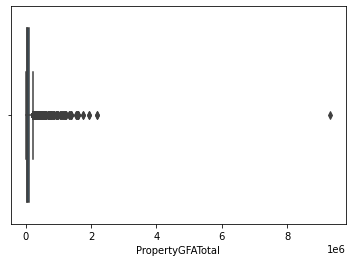

In [63]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["PropertyGFATotal"])
plt.show()

In [64]:
# Affichage des valeurs classées :
data["PropertyGFATotal"].sort_values()

3245      11285
3243      11685
3244      11968
3253      12294
3247      12769
         ...   
1104    1952220
1105    1952220
1911    2200000
1910    2200000
3221    9320156
Name: PropertyGFATotal, Length: 3258, dtype: int64

In [65]:
# Affichage du data classé par la variable :
data.sort_values(by="PropertyGFATotal", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.00000,0.0,11140.56,1.20,98105.0,NE 45th St & Brooklyn Ave,47.65644,-122.31041
1910,22062,2015,Campus,University,Entire Campus,2254500880,3,East,1939,39.0,...,18292370.0,62416157.0,526666.00000,52666569.0,3232.23,1.35,19578.0,901 12th Avenue,47.61065,-122.31711
1911,22062,2016,Campus,University,Entire Campus,2254500880,3,East,1939,1.0,...,18075270.0,61672821.0,529756.93750,52975694.0,3243.48,1.47,98122.0,901 12th Avenue,47.61065,-122.31711
1104,775,2015,NonResidential,Large Office,Columbia Center - 2015,942000640,7,Downtown,1985,1.0,...,26597630.0,90754881.0,38090.00000,3808965.0,834.96,0.23,18379.0,701 5th Avenue,47.60454,-122.33072
1105,775,2016,NonResidential,Large Office,Columbia Center - 2015,942000640,7,Downtown,1985,1.0,...,25747908.0,87851862.0,50857.63281,5085763.0,882.56,0.45,98104.0,701 5th Avenue,47.60454,-122.33072


#### 11) "PropertyGFAParking" :

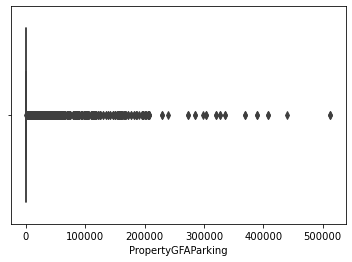

In [66]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["PropertyGFAParking"])
plt.show()

In [67]:
# Affichage des valeurs classées :
data["PropertyGFAParking"].sort_values()

3040        -2
0            0
2105         0
2106         0
2107         0
         ...  
590     407795
591     407795
1074    440185
523     512608
522     512608
Name: PropertyGFAParking, Length: 3258, dtype: int64

In [68]:
# Affichage du data classé par la variable :
data.sort_values(by="PropertyGFAParking", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
522,402,2015,NonResidential,Large Office,Us Bank Centre,1975700080,7,Downtown,1989,1.0,...,15458670.0,52747171.0,30690.00000,3069000.0,530.70,0.20,18081.0,1420 5th Avenue,47.61054,-122.33466
523,402,2016,NonResidential,Large Office,Us Bank Centre,1975700080,7,Downtown,1989,1.0,...,15729209.0,53668061.0,29380.69922,2938070.0,530.18,0.35,98101.0,1420 5th Avenue,47.61054,-122.33466
1074,758,2015,NonResidential,Other,Pacific Place,6600470000,7,Downtown,1999,1.0,...,14109970.0,48145216.0,0.00000,0.0,335.63,0.14,18081.0,600 Pine Street,47.61289,-122.33531
591,438,2016,NonResidential,Medical Office,1101 Madison Tower,1978200625,3,East,1992,1.0,...,6200665.0,21156669.0,0.00000,0.0,147.49,0.21,98104.0,1101 Madison,47.60921,-122.32425
590,438,2015,NonResidential,Medical Office,1101 Madison Tower,1978200625,3,East,1992,1.0,...,5522024.0,18841928.0,0.00000,0.0,131.35,0.07,18379.0,1101 Madison,47.60921,-122.32425


In [69]:
data["PropertyGFAParking"].sort_values()

3040        -2
0            0
2105         0
2106         0
2107         0
         ...  
590     407795
591     407795
1074    440185
523     512608
522     512608
Name: PropertyGFAParking, Length: 3258, dtype: int64

In [70]:
# Suppression des valeurs négatives :
data.loc[data["PropertyGFAParking"]<0, "PropertyGFAParking"] = np.NaN

#### 12) "PropertyGFABuilding(s)" :

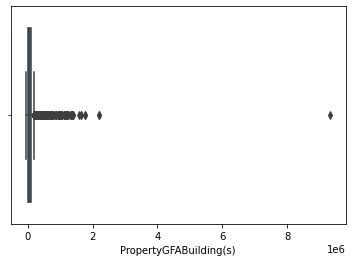

In [71]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["PropertyGFABuilding(s)"])
plt.show()

In [72]:
# Affichage des valeurs classées :
data["PropertyGFABuilding(s)"].sort_values()

3186     -50550
3046     -43310
1555       3636
1358      10925
1359      10925
         ...   
1183    1765970
1182    1765970
1910    2200000
1911    2200000
3221    9320156
Name: PropertyGFABuilding(s), Length: 3258, dtype: int64

In [73]:
# Affichage du data classé par la variable :
data.sort_values(by="PropertyGFABuilding(s)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.0000,0.0,11140.56,1.20,98105.0,NE 45th St & Brooklyn Ave,47.656440,-122.310410
1911,22062,2016,Campus,University,Entire Campus,2254500880,3,East,1939,1.0,...,18075270.0,61672821.0,529756.9375,52975694.0,3243.48,1.47,98122.0,901 12th Avenue,47.610650,-122.317110
1910,22062,2015,Campus,University,Entire Campus,2254500880,3,East,1939,39.0,...,18292370.0,62416157.0,526666.0000,52666569.0,3232.23,1.35,19578.0,901 12th Avenue,47.610650,-122.317110
1183,828,2016,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,7.0,...,40842564.0,139354828.0,173161.2031,17316120.0,12307.16,6.97,98122.0,747 Broadway,47.608951,-122.322402
1182,828,2015,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,1.0,...,41161340.0,140448322.0,183733.0000,18373320.0,11824.89,6.35,19578.0,747 Broadway,47.608951,-122.322402


In [74]:
# Suppression des valeurs négatives :
data.loc[data["PropertyGFABuilding(s)"]<0, "PropertyGFABuilding(s)"] = np.NaN

#### 13) "LargestPropertyUseType" :

In [75]:
# différentes valeurs de la variable :
data["LargestPropertyUseType"].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       nan, 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Retail Store', 'Other - Mall', 'Senior Care Community',
       'Medical Office', 'Hospital (General Medical & Surgical)',
       'Museum', 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Pla

In [76]:
# Valeurs manquantes :
data["LargestPropertyUseType"].isna().sum()

60

In [77]:
# Imputation des informations manquantes avec celles de la variable "PrimaryPropertyType"
data["LargestPropertyUseType"].fillna(data["PrimaryPropertyType"], inplace=True)

#### 14) "LargestPropertyUseTypeGFA" :

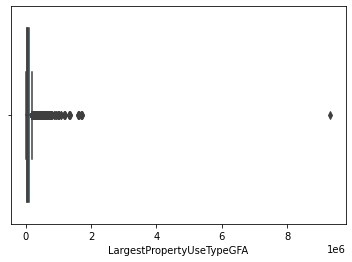

In [78]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["LargestPropertyUseTypeGFA"])
plt.show()

In [79]:
# Affichage de l'outlier :
data[data["LargestPropertyUseTypeGFA"]>8000000]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.0,0.0,11140.56,1.2,98105.0,NE 45th St & Brooklyn Ave,47.65644,-122.31041


In [80]:
# Vérification des informations manquantes :
data["LargestPropertyUseTypeGFA"].isna().sum()

60

In [81]:
# Imputation des valeurs manquantes par déduction
data["LargestPropertyUseTypeGFA"].fillna(data["PropertyGFATotal"]-data["SecondLargestPropertyUseTypeGFA"].fillna(0)-data["ThirdLargestPropertyUseTypeGFA"].fillna(0), inplace=True)

#### 15) "SecondLargestPropertyUseType" :

In [82]:
# différentes valeurs de la variable :
data["SecondLargestPropertyUseType"].unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Refrigerated Warehouse', 'Non-Refrigerated Warehouse',
       'Other - Education', 'Vocational School', 'Retail Store',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Laboratory', 'Movie Theater', 'Supermarket/Grocery Store',
       'Medical Office', 'Other - Recreation',
       'Convenience Store without Gas Station',
       'Fitness Center/Health Club/Gym', 'Performing Arts',
       'College/University', 'Other - Restaurant/Bar', 'Adult Education',
       'Enclosed Mall', 'Multifamily Housing', 'Bar/Nightclub',
       'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Manufacturing/Industrial Plant', 'Other - Lodging/Residential',
       'Bank Bran

#### 16) "SecondLargestPropertyUseTypeGFA" :

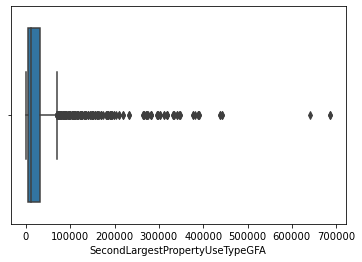

In [83]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["SecondLargestPropertyUseTypeGFA"])
plt.show()

In [84]:
# Affichage des outliers
data[data["SecondLargestPropertyUseTypeGFA"]>600000]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
584,435,2015,NonResidential,Other,Washington State Convention Center,1978200105,7,Downtown,1990,1.0,...,17208710.0,58718556.0,16374.0,1637420.0,1793.90,1.10,18081.0,705 Pike St,47.61195,-122.33167
585,435,2016,NonResidential,Other,Washington State Convention Center,1978200105,7,Downtown,1990,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,98101.0,705 Pike St,47.61195,-122.33167
3191,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,...,44102076.0,150476283.0,2979090.0,297909000.0,16870.98,34.09,98108.0,7755 E MARGINAL WAY S,47.53493,-122.31788


In [85]:
# Nombre de valeurs manquantes dans la variable :
data["SecondLargestPropertyUseTypeGFA"].isna().sum()

1616

In [86]:
# Nombre de valeurs manquantes dans la variables associée :
data["SecondLargestPropertyUseType"].isna().sum()

1616

#### 17) "ThirdLargestPropertyUseType" :

In [87]:
# différentes valeurs de la variable :
data["ThirdLargestPropertyUseType"].unique()

array([nan, 'Restaurant', 'Swimming Pool', 'Data Center', 'Office',
       'Retail Store', 'Other - Entertainment/Public Assembly', 'Other',
       'Distribution Center', 'Food Service', 'Other - Services',
       'Medical Office', 'Parking', 'Other - Utility', 'K-12 School',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Pre-school/Daycare', 'Convenience Store without Gas Station',
       'Financial Office', 'Non-Refrigerated Warehouse',
       'Other - Restaurant/Bar', 'Other - Education',
       'Multifamily Housing', 'Laboratory', 'Bank Branch', 'Hotel',
       'Other - Recreation',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Self-Storage Facility', 'Other - Technology/Science',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Bar/Nightclub', 'Other/Specialty Hospital',
       'Fast Food Restaurant', 'Worship Facility',
       'Supermarket/Grocery Store', 'Enclosed Mall', 'Strip Mall',
       'Vocational 

#### 18) "ThirdLargestPropertyUseTypeGFA"

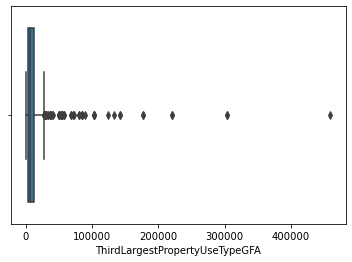

In [88]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["ThirdLargestPropertyUseTypeGFA"])
plt.show()

In [89]:
# Affichage des outliers
data[data["ThirdLargestPropertyUseTypeGFA"]>150000]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
922,640,2015,NonResidential,Large Office,Starbucks Center,7666207220,2,Greater Duwamish,1912,1.0,...,20352100.0,69444248.0,8.831100e+04,8831128.0,953.12,0.47,19584.0,2401 Utah Ave South,47.58181,-122.33534
923,640,2016,NonResidential,Large Office,Starbucks Center,7666207220,2,Greater Duwamish,1912,NaN,...,19859480.0,67760546.0,6.370020e+04,6370020.0,810.70,0.59,98134.0,2401 Utah Ave South,47.58181,-122.33534
946,659,2015,NonResidential,Large Office,Russell Investments Center,9184500000,7,Downtown,2005,1.0,...,16567390.0,56530281.0,4.146000e+03,414587.0,500.93,0.16,18081.0,1301 2nd Ave,47.60740,-122.33777
947,659,2016,NonResidential,Large Office,Russell Investments Center,9184500000,7,Downtown,2005,1.0,...,16155898.0,55123924.0,3.885317e+03,388532.0,481.06,0.30,98101.0,1301 2nd Ave,47.60740,-122.33777
2712,25992,2015,NonResidential,Mixed Use Property,2201 / Enso Condominiums - Sedo,8729760000,7,Downtown,2009,1.0,...,7290661.0,24876768.0,4.872100e+04,4872130.0,432.18,0.27,19576.0,2201 9th Ave. / 820 Blanchard St.,47.61811,-122.33908
2713,25992,2016,NonResidential,Mixed Use Property,2201 / Enso Condominiums - Sedo,8729760000,7,Downtown,2009,1.0,...,6841566.5,23343425.0,4.341053e+04,4341053.0,393.29,0.33,98121.0,2201 9th Ave. / 820 Blanchard St.,47.61811,-122.33908
3191,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,...,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,98108.0,7755 E MARGINAL WAY S,47.53493,-122.31788


In [90]:
# Nombre de valeurs manquantes dans la variable :
data["ThirdLargestPropertyUseTypeGFA"].isna().sum()

2582

In [91]:
# Nombre de valeurs manquantes dans la variables associée :
data["ThirdLargestPropertyUseType"].isna().sum()

2582

#### 19) "ENERGYSTARScore" :

In [92]:
# différentes valeurs de la variable :
data["ENERGYSTARScore"].unique()

array([ 65.,  60.,  51.,  61.,  18.,  43.,  67.,  75.,  nan,  25.,  27.,
        46.,  48.,  30.,  32.,  36.,  39.,  56.,  58.,  14.,  35.,  31.,
        83.,  76.,  96.,  95.,  85.,  84.,  20.,  57.,  80.,  94.,  29.,
        77.,   1.,  91.,  97.,  88.,  93.,  68.,  79.,  78.,  71.,  63.,
        99.,  98.,  86.,  81.,  50.,  54.,  74.,  24.,  40.,  37.,  89.,
        72.,  52.,  53.,  34., 100.,  92.,  28.,  90.,  62.,  19.,  21.,
        13.,  10.,  82.,  87.,  73.,  70.,  64.,  55.,  45.,  49.,  42.,
         7.,   8.,  23.,  59.,  66.,  69.,  17.,   3.,  22.,  11.,  44.,
         4.,   2.,   6.,   5.,  16.,  38.,  33.,  26.,  47.,  41.,  15.,
        12.,   9.])

Les valeurs de l'Energy Star Score correspondent bien à une note de 1 à 100. Pas d'anomalies.

#### 20) "SiteEUI(kBtu/sf)" :

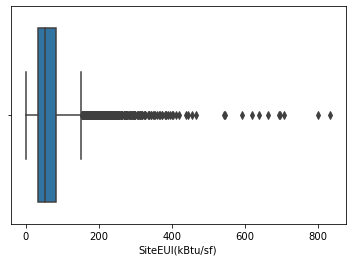

In [93]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["SiteEUI(kBtu/sf)"])
plt.show()

In [94]:
# Affichage des valeurs classées :
data["SiteEUI(kBtu/sf)"].dropna().sort_values()

1301      0.000000
155       0.000000
269       0.000000
1207      0.000000
84        0.000000
           ...    
3135    694.700012
1347    696.700012
595     707.299988
594     800.600000
3195    834.400024
Name: SiteEUI(kBtu/sf), Length: 3257, dtype: float64

In [95]:
# Affichage du data classé par la variable :
data.sort_values(by="SiteEUI(kBtu/sf)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3195,365,2016,NonResidential,Other,Uw Tower Data Center,1142000290,4,Northeast,1969,1.0,...,8803777.0,30038487.0,0.0000,0.0,209.41,5.82,98185.0,4333 BROOKLYN AVE NE,47.66060,-122.31512
594,440,2015,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,...,24863430.0,84837545.0,1467.0000,146727.0,599.20,1.10,18390.0,100 4th Ave N,47.61915,-122.34857
595,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,...,21957020.0,74917352.0,1565.2500,156525.0,530.59,2.48,98109.0,100 4th Ave N,47.61915,-122.34857
1347,19900,2016,NonResidential,Laboratory,3000/3018 Western,695000090,7,Downtown,1926,NaN,...,3181345.0,10854749.0,224136.6094,22413661.0,1266.06,25.71,98121.0,3018 Western Ave.,47.61763,-122.35507
3135,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,659000905,7,Downtown,1975,1.0,...,12215895.0,41680634.0,0.0000,0.0,290.57,3.20,98121.0,2020 Fifth Avenue,47.61449,-122.33956


In [96]:
# Remplacement des valeurs nulles :
data["SiteEUI(kBtu/sf)"] = data["SiteEUI(kBtu/sf)"].replace(0, np.NaN)

#### 21) "SiteEUIWN(kBtu/sf)" :

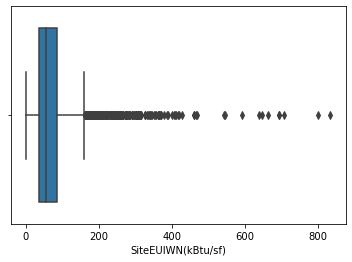

In [97]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["SiteEUIWN(kBtu/sf)"])
plt.show()

In [98]:
# Affichage des valeurs classées :
data["SiteEUIWN(kBtu/sf)"].dropna().sort_values()

3192      0.000000
155       0.000000
1301      0.000000
3111      0.000000
2416      0.000000
           ...    
1347    693.099976
3135    694.700012
595     707.299988
594     800.600000
3195    834.400024
Name: SiteEUIWN(kBtu/sf), Length: 3257, dtype: float64

In [99]:
# Affichage du data classé par la variable :
data.sort_values(by="SiteEUIWN(kBtu/sf)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3195,365,2016,NonResidential,Other,Uw Tower Data Center,1142000290,4,Northeast,1969,1.0,...,8803777.0,30038487.0,0.0000,0.0,209.41,5.82,98185.0,4333 BROOKLYN AVE NE,47.66060,-122.31512
594,440,2015,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,...,24863430.0,84837545.0,1467.0000,146727.0,599.20,1.10,18390.0,100 4th Ave N,47.61915,-122.34857
595,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,...,21957020.0,74917352.0,1565.2500,156525.0,530.59,2.48,98109.0,100 4th Ave N,47.61915,-122.34857
3135,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,659000905,7,Downtown,1975,1.0,...,12215895.0,41680634.0,0.0000,0.0,290.57,3.20,98121.0,2020 Fifth Avenue,47.61449,-122.33956
1347,19900,2016,NonResidential,Laboratory,3000/3018 Western,695000090,7,Downtown,1926,NaN,...,3181345.0,10854749.0,224136.6094,22413661.0,1266.06,25.71,98121.0,3018 Western Ave.,47.61763,-122.35507


In [100]:
# Remplacement des valeurs nulles :
data["SiteEUIWN(kBtu/sf)"] = data["SiteEUIWN(kBtu/sf)"].replace(0, np.NaN)

#### 22) "SourceEUI(kBtu/sf)"" et "SourceEUIWN(kBtu/sf)" :

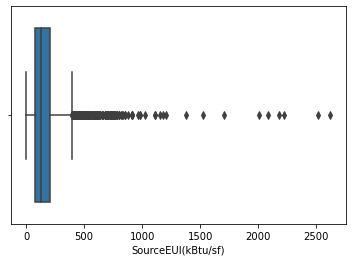

In [101]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["SourceEUI(kBtu/sf)"])
plt.show()

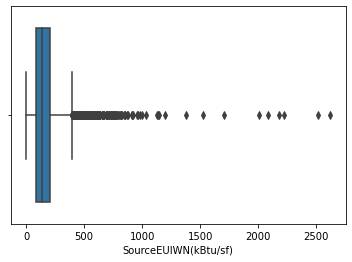

In [102]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["SourceEUIWN(kBtu/sf)"])
plt.show()

In [103]:
# Affichage des valeurs classées :
data["SourceEUI(kBtu/sf)"].dropna().sort_values()

3138      -2.000000
3111       0.000000
3192       0.000000
163        0.000000
155        0.000000
           ...     
1064    2082.300000
3135    2181.300049
595     2217.800049
594     2511.100000
3195    2620.000000
Name: SourceEUI(kBtu/sf), Length: 3258, dtype: float64

In [104]:
# Affichage des valeurs classées :
data["SourceEUIWN(kBtu/sf)"].dropna().sort_values()

3139      -2.100000
3138      -2.000000
3224       0.000000
163        0.000000
3222       0.000000
           ...     
1064    2082.300000
3135    2181.300049
595     2217.800049
594     2511.000000
3195    2620.000000
Name: SourceEUIWN(kBtu/sf), Length: 3258, dtype: float64

In [105]:
# Affichage du data classé par la variable :
data.sort_values(by="SourceEUI(kBtu/sf)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3195,365,2016,NonResidential,Other,Uw Tower Data Center,1142000290,4,Northeast,1969,1.0,...,8803777.0,30038487.0,0.00,0.0,209.41,5.82,98185.0,4333 BROOKLYN AVE NE,47.66060,-122.31512
594,440,2015,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,...,24863430.0,84837545.0,1467.00,146727.0,599.20,1.10,18390.0,100 4th Ave N,47.61915,-122.34857
595,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,...,21957020.0,74917352.0,1565.25,156525.0,530.59,2.48,98109.0,100 4th Ave N,47.61915,-122.34857
3135,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,659000905,7,Downtown,1975,1.0,...,12215895.0,41680634.0,0.00,0.0,290.57,3.20,98121.0,2020 Fifth Avenue,47.61449,-122.33956
1064,753,2015,NonResidential,Other,Westinbuilding,659000950,7,Downtown,1981,1.0,...,83445048.0,284726322.0,1526.00,152639.0,1992.96,1.79,19576.0,2001 6th Ave,47.61438,-122.33871


In [106]:
# Affichage du data classé par la variable :
data.sort_values(by="SourceEUIWN(kBtu/sf)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3195,365,2016,NonResidential,Other,Uw Tower Data Center,1142000290,4,Northeast,1969,1.0,...,8803777.0,30038487.0,0.00,0.0,209.41,5.82,98185.0,4333 BROOKLYN AVE NE,47.66060,-122.31512
594,440,2015,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,...,24863430.0,84837545.0,1467.00,146727.0,599.20,1.10,18390.0,100 4th Ave N,47.61915,-122.34857
595,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,1991200170,7,Lake Union,2001,1.0,...,21957020.0,74917352.0,1565.25,156525.0,530.59,2.48,98109.0,100 4th Ave N,47.61915,-122.34857
3135,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,659000905,7,Downtown,1975,1.0,...,12215895.0,41680634.0,0.00,0.0,290.57,3.20,98121.0,2020 Fifth Avenue,47.61449,-122.33956
1064,753,2015,NonResidential,Other,Westinbuilding,659000950,7,Downtown,1981,1.0,...,83445048.0,284726322.0,1526.00,152639.0,1992.96,1.79,19576.0,2001 6th Ave,47.61438,-122.33871


Ces deux variables sont le pendant des deux variables précédentes prises à la source. Sans surprise, on tombe sur des résultats quasiment identiques.

In [107]:
# Suppression des valeurs négatives et remplacement des 0 :
data["SourceEUI(kBtu/sf)"] = data["SourceEUI(kBtu/sf)"].replace(0, np.NaN)
data["SourceEUIWN(kBtu/sf)"] = data["SourceEUIWN(kBtu/sf)"].replace(0, np.NaN)
data.loc[data["SourceEUI(kBtu/sf)"]<0, "SourceEUI(kBtu/sf)"] = np.NaN
data.loc[data["SourceEUIWN(kBtu/sf)"]<0, "SourceEUIWN(kBtu/sf)"] = np.NaN

#### 23) "SiteEnergyUse(kBtu)" et "SiteEnergyUseWN(kBtu)" :

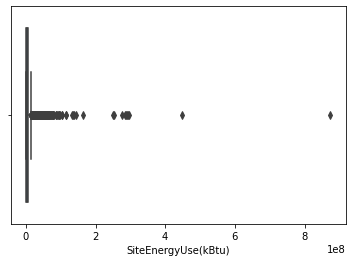

In [108]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["SiteEnergyUse(kBtu)"])
plt.show()

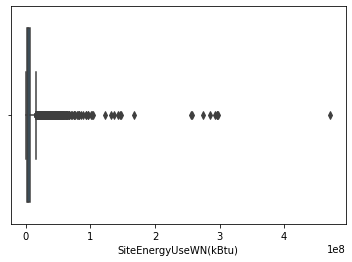

In [109]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["SiteEnergyUseWN(kBtu)"])
plt.show()

In [110]:
# Affichage des valeurs classées :
data["SiteEnergyUse(kBtu)"].dropna().sort_values()

269             0.0
1177            0.0
257             0.0
84              0.0
53              0.0
           ...     
1183    291614432.0
329     293090784.0
328     295812640.0
3191    448385312.0
3221    873923712.0
Name: SiteEnergyUse(kBtu), Length: 3258, dtype: float64

In [111]:
# Affichage des valeurs classées :
data["SiteEnergyUseWN(kBtu)"].dropna().sort_values()

257             0.0
1386            0.0
1088            0.0
1301            0.0
1207            0.0
           ...     
1182    292746272.0
1183    295929888.0
329     296671744.0
328     297740960.0
3191    471613856.0
Name: SiteEnergyUseWN(kBtu), Length: 3257, dtype: float64

In [112]:
# Affichage du data classé par la variable :
data.sort_values(by="SiteEnergyUse(kBtu)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.000000e+00,0.0,11140.56,1.20,98105.0,NE 45th St & Brooklyn Ave,47.656440,-122.310410
3191,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,...,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,98108.0,7755 E MARGINAL WAY S,47.534930,-122.317880
328,276,2015,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,1.0,...,50083380.0,170891586.0,2.226400e+04,2226424.0,10780.64,8.67,18379.0,325 9th Ave.,47.603990,-122.323770
329,276,2016,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,9.0,...,49438336.0,168683602.0,1.832129e+04,1832129.0,10734.57,9.26,98104.0,325 9th Ave.,47.603990,-122.323770
1183,828,2016,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,7.0,...,40842564.0,139354828.0,1.731612e+05,17316120.0,12307.16,6.97,98122.0,747 Broadway,47.608951,-122.322402


In [113]:
# Affichage du data classé par la variable :
data.sort_values(by="SiteEnergyUseWN(kBtu)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3191,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,...,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,98108.0,7755 E MARGINAL WAY S,47.534930,-122.317880
328,276,2015,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,1.0,...,50083380.0,170891586.0,2.226400e+04,2226424.0,10780.64,8.67,18379.0,325 9th Ave.,47.603990,-122.323770
329,276,2016,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,9.0,...,49438336.0,168683602.0,1.832129e+04,1832129.0,10734.57,9.26,98104.0,325 9th Ave.,47.603990,-122.323770
1183,828,2016,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,7.0,...,40842564.0,139354828.0,1.731612e+05,17316120.0,12307.16,6.97,98122.0,747 Broadway,47.608951,-122.322402
1182,828,2015,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,1.0,...,41161340.0,140448322.0,1.837330e+05,18373320.0,11824.89,6.35,19578.0,747 Broadway,47.608951,-122.322402


In [114]:
# Affichage de la valeur pour l'Université de Washington :
data["SiteEnergyUseWN(kBtu)"][3227]

4075094.5

In [115]:
# Remplacement de la valeur manquante de l'Université de Washington :
data.loc[3227, "SiteEnergyUseWN(kBtu)"] = data.loc[3227, "SiteEnergyUse(kBtu)"] * (data.loc[3197, "SiteEnergyUseWN(kBtu)"] / data.loc[3197, "SiteEnergyUse(kBtu)"])

In [116]:
# Remplacement des valeurs nulles par NaN :
data["SiteEnergyUse(kBtu)"] = data["SiteEnergyUse(kBtu)"].replace(0, np.NaN)
data["SiteEnergyUseWN(kBtu)"] = data["SiteEnergyUseWN(kBtu)"].replace(0, np.NaN)

#### 24) "SteamUse(kBtu)" :

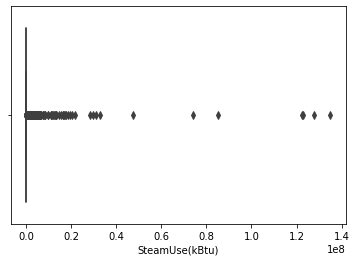

In [117]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["SteamUse(kBtu)"])
plt.show()

In [118]:
# Affichage des valeurs classées :
data["SteamUse(kBtu)"].dropna().sort_values()

1628            0.0
2161            0.0
2162            0.0
2163            0.0
2164            0.0
           ...     
3221     84985240.0
329     122575032.0
328     122701720.0
1182    127869744.0
1183    134943456.0
Name: SteamUse(kBtu), Length: 3258, dtype: float64

In [119]:
# Affichage du data classé par la variable :
data.sort_values(by="SteamUse(kBtu)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
1183,828,2016,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,7.0,...,40842564.0,139354828.0,173161.20310,17316120.0,12307.16,6.97,98122.0,747 Broadway,47.608951,-122.322402
1182,828,2015,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,1.0,...,41161340.0,140448322.0,183733.00000,18373320.0,11824.89,6.35,19578.0,747 Broadway,47.608951,-122.322402
328,276,2015,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,1.0,...,50083380.0,170891586.0,22264.00000,2226424.0,10780.64,8.67,18379.0,325 9th Ave.,47.603990,-122.323770
329,276,2016,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,9.0,...,49438336.0,168683602.0,18321.29102,1832129.0,10734.57,9.26,98104.0,325 9th Ave.,47.603990,-122.323770
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.00000,0.0,11140.56,1.20,98105.0,NE 45th St & Brooklyn Ave,47.656440,-122.310410


#### 25) "Electricity(kWh)" et "Electricity(kBtu)" :

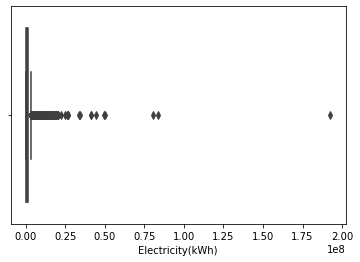

In [120]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["Electricity(kWh)"])
plt.show()

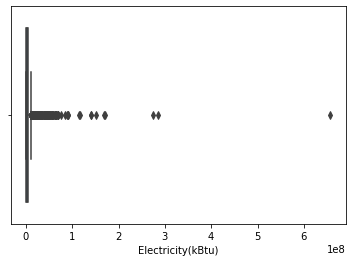

In [121]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["Electricity(kBtu)"])
plt.show()

In [122]:
# Affichage des valeurs classées :
data["Electricity(kWh)"].dropna().sort_values()

3139   -3.382680e+04
3111    0.000000e+00
53      0.000000e+00
257     0.000000e+00
2165    0.000000e+00
            ...     
329     4.943834e+07
328     5.008338e+07
1065    8.046087e+07
1064    8.344505e+07
3221    1.925775e+08
Name: Electricity(kWh), Length: 3258, dtype: float64

In [123]:
# Affichage des valeurs classées :
data["Electricity(kBtu)"].dropna().sort_values()

3139      -115417.0
3111            0.0
53              0.0
257             0.0
2165            0.0
           ...     
329     168683602.0
328     170891586.0
1065    274532495.0
1064    284726322.0
3221    657074389.0
Name: Electricity(kBtu), Length: 3258, dtype: float64

In [124]:
# Affichage du data classé par la variable :
data.sort_values(by="Electricity(kWh)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.000000,0.0,11140.56,1.20,98105.0,NE 45th St & Brooklyn Ave,47.65644,-122.31041
1064,753,2015,NonResidential,Other,Westinbuilding,659000950,7,Downtown,1981,1.0,...,83445048.0,284726322.0,1526.000000,152639.0,1992.96,1.79,19576.0,2001 6th Ave,47.61438,-122.33871
1065,753,2016,NonResidential,Other,Westinbuilding,659000950,7,Downtown,1981,1.0,...,80460872.0,274532495.0,1496.720215,149672.0,1921.82,4.48,98121.0,2001 6th Ave,47.61438,-122.33871
328,276,2015,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,1.0,...,50083380.0,170891586.0,22264.000000,2226424.0,10780.64,8.67,18379.0,325 9th Ave.,47.60399,-122.32377
329,276,2016,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,9.0,...,49438336.0,168683602.0,18321.291020,1832129.0,10734.57,9.26,98104.0,325 9th Ave.,47.60399,-122.32377


In [125]:
# Affichage du data classé par la variable :
data.sort_values(by="Electricity(kBtu)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.000000,0.0,11140.56,1.20,98105.0,NE 45th St & Brooklyn Ave,47.65644,-122.31041
1064,753,2015,NonResidential,Other,Westinbuilding,659000950,7,Downtown,1981,1.0,...,83445048.0,284726322.0,1526.000000,152639.0,1992.96,1.79,19576.0,2001 6th Ave,47.61438,-122.33871
1065,753,2016,NonResidential,Other,Westinbuilding,659000950,7,Downtown,1981,1.0,...,80460872.0,274532495.0,1496.720215,149672.0,1921.82,4.48,98121.0,2001 6th Ave,47.61438,-122.33871
328,276,2015,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,1.0,...,50083380.0,170891586.0,22264.000000,2226424.0,10780.64,8.67,18379.0,325 9th Ave.,47.60399,-122.32377
329,276,2016,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,9.0,...,49438336.0,168683602.0,18321.291020,1832129.0,10734.57,9.26,98104.0,325 9th Ave.,47.60399,-122.32377


In [126]:
# Remplacement des valeurs négatives et nulles par NaN :
data["Electricity(kWh)"] = data["Electricity(kWh)"].replace(0, np.NaN)
data["Electricity(kBtu)"] = data["Electricity(kBtu)"].replace(0, np.NaN)
data.loc[data["Electricity(kBtu)"]<0, "Electricity(kBtu)"] = np.NaN

#### 26) "NaturalGas(therms)" et "NaturalGas(kBtu)" :

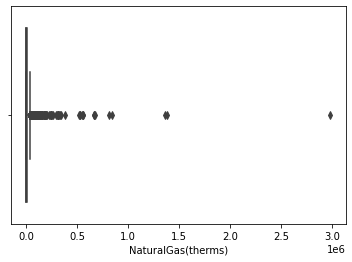

In [127]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["NaturalGas(therms)"])
plt.show()

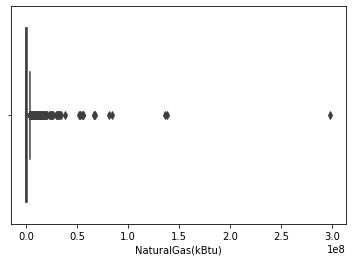

In [128]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["NaturalGas(kBtu)"])
plt.show()

In [129]:
# Affichage des valeurs classées :
data["NaturalGas(therms)"].dropna().sort_values()

1074    0.000000e+00
2623    0.000000e+00
2622    0.000000e+00
1441    0.000000e+00
1440    0.000000e+00
            ...     
322     8.162190e+05
323     8.466809e+05
238     1.364484e+06
239     1.381912e+06
3191    2.979090e+06
Name: NaturalGas(therms), Length: 3258, dtype: float64

In [130]:
# Affichage des valeurs classées :
data["NaturalGas(kBtu)"].dropna().sort_values()

1074            0.0
2623            0.0
2622            0.0
1441            0.0
1440            0.0
           ...     
322      81621919.0
323      84668094.0
238     136448438.0
239     138191238.0
3191    297909000.0
Name: NaturalGas(kBtu), Length: 3258, dtype: float64

In [131]:
# Affichage du data classé par la variable :
data.sort_values(by="NaturalGas(therms)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3191,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,...,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,98108.0,7755 E MARGINAL WAY S,47.53493,-122.31788
239,198,2016,NonResidential,Hospital,Seattle Children'S Hospital Main Campus,2982800005,4,Northeast,1953,6.0,...,33892500.0,115641210.0,1.381912e+06,138191238.0,8145.52,9.27,98105.0,4800 Sand Point Way NE,47.66231,-122.28146
238,198,2015,NonResidential,Hospital,Seattle Children'S Hospital Main Campus,2982800005,4,Northeast,1953,1.0,...,33629360.0,114748139.0,1.364484e+06,136448438.0,8046.70,8.59,18383.0,4800 Sand Point Way NE,47.66231,-122.28146
323,268,2016,NonResidential,Hospital,Swedish Cherry Hill,7942600331,3,Central,1990,6.0,...,17220084.0,58754927.0,8.466809e+05,84668094.0,4906.33,8.21,98122.0,500 17th Ave,47.60705,-122.30966
322,268,2015,NonResidential,Hospital,Swedish Cherry Hill,7942600331,3,Central,1990,1.0,...,16416700.0,56016106.0,8.162190e+05,81621919.0,4725.43,7.51,19578.0,500 17th Ave,47.60705,-122.30966


In [132]:
# Affichage du data classé par la variable :
data.sort_values(by="NaturalGas(kBtu)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3191,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,...,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,98108.0,7755 E MARGINAL WAY S,47.53493,-122.31788
239,198,2016,NonResidential,Hospital,Seattle Children'S Hospital Main Campus,2982800005,4,Northeast,1953,6.0,...,33892500.0,115641210.0,1.381912e+06,138191238.0,8145.52,9.27,98105.0,4800 Sand Point Way NE,47.66231,-122.28146
238,198,2015,NonResidential,Hospital,Seattle Children'S Hospital Main Campus,2982800005,4,Northeast,1953,1.0,...,33629360.0,114748139.0,1.364484e+06,136448438.0,8046.70,8.59,18383.0,4800 Sand Point Way NE,47.66231,-122.28146
323,268,2016,NonResidential,Hospital,Swedish Cherry Hill,7942600331,3,Central,1990,6.0,...,17220084.0,58754927.0,8.466809e+05,84668094.0,4906.33,8.21,98122.0,500 17th Ave,47.60705,-122.30966
322,268,2015,NonResidential,Hospital,Swedish Cherry Hill,7942600331,3,Central,1990,1.0,...,16416700.0,56016106.0,8.162190e+05,81621919.0,4725.43,7.51,19578.0,500 17th Ave,47.60705,-122.30966


#### 27) "GHGEmissions(MetricTonsCO2e)" et "GHGEmissionsIntensity(kgCO2e/ft2)" :

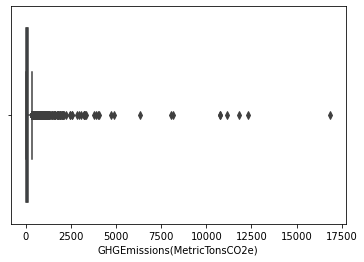

In [133]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["GHGEmissions(MetricTonsCO2e)"])
plt.show()

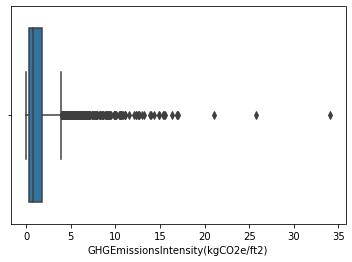

In [134]:
# Visualisation de la distribution
plt.figure()
sns.boxplot(x=data["GHGEmissionsIntensity(kgCO2e/ft2)"])
plt.show()

In [135]:
# Affichage des valeurs classées :
data["GHGEmissions(MetricTonsCO2e)"].dropna().sort_values()

3139       -0.80
53          0.00
84          0.00
1829        0.00
3198        0.00
          ...   
328     10780.64
3221    11140.56
1182    11824.89
1183    12307.16
3191    16870.98
Name: GHGEmissions(MetricTonsCO2e), Length: 3258, dtype: float64

In [136]:
# Affichage des valeurs classées :
data["GHGEmissionsIntensity(kgCO2e/ft2)"].dropna().sort_values()

3139    -0.02
295      0.00
53       0.00
1138     0.00
2486     0.00
        ...  
3247    16.93
3255    16.99
1346    21.10
1347    25.71
3191    34.09
Name: GHGEmissionsIntensity(kgCO2e/ft2), Length: 3258, dtype: float64

In [137]:
# Affichage du data classé par la variable :
data.sort_values(by="GHGEmissions(MetricTonsCO2e)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3191,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,...,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,98108.0,7755 E MARGINAL WAY S,47.534930,-122.317880
1183,828,2016,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,7.0,...,40842564.0,139354828.0,1.731612e+05,17316120.0,12307.16,6.97,98122.0,747 Broadway,47.608951,-122.322402
1182,828,2015,NonResidential,Hospital,Swedish First Hill,1978201096,3,East,1994,1.0,...,41161340.0,140448322.0,1.837330e+05,18373320.0,11824.89,6.35,19578.0,747 Broadway,47.608951,-122.322402
3221,49967,2016,Campus,University,University Of Washington - Seattle Campus,1625049001,4,Northeast,1900,111.0,...,192577488.0,657074389.0,0.000000e+00,0.0,11140.56,1.20,98105.0,NE 45th St & Brooklyn Ave,47.656440,-122.310410
328,276,2015,NonResidential,Hospital,Harborview Medical Center,8590900220,3,East,2000,1.0,...,50083380.0,170891586.0,2.226400e+04,2226424.0,10780.64,8.67,18379.0,325 9th Ave.,47.603990,-122.323770


In [138]:
# Affichage du data classé par la variable :
data.sort_values(by="GHGEmissionsIntensity(kgCO2e/ft2)", ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Zip Codes,Address,Latitude,Longitude
3191,43,2016,Campus,Mixed Use Property,Plant 2 Site,22000005,2,Greater Duwamish,1992,1.0,...,4.410208e+07,1.504763e+08,2.979090e+06,2.979090e+08,16870.98,34.09,98108.0,7755 E MARGINAL WAY S,47.53493,-122.31788
1347,19900,2016,NonResidential,Laboratory,3000/3018 Western,695000090,7,Downtown,1926,NaN,...,3.181345e+06,1.085475e+07,2.241366e+05,2.241366e+07,1266.06,25.71,98121.0,3018 Western Ave.,47.61763,-122.35507
1346,19900,2015,NonResidential,Other,3000/3018 Western,695000090,7,Downtown,1926,1.0,...,3.076883e+06,1.049876e+07,1.904170e+05,1.904173e+07,1084.49,21.10,19576.0,3018 Western Ave.,47.61763,-122.35507
3255,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,Magnolia / Queen Anne,1974,1.0,...,5.252517e+05,1.792159e+06,3.973739e+04,3.973739e+06,223.54,16.99,NaN,1920 1st Ave W,47.63644,-122.35784
3247,50208,2016,Nonresidential COS,Other,Ballard Pool,3050700005,6,Ballard,1972,1.0,...,3.532161e+05,1.205173e+06,3.912135e+04,3.912135e+06,216.18,16.93,NaN,1471 NW 67th St,47.67734,-122.37624


In [139]:
# Remplacement des valeurs négatives et nulles par NaN :
data["GHGEmissions(MetricTonsCO2e)"] = data["GHGEmissions(MetricTonsCO2e)"].replace(0, np.NaN)
data["GHGEmissionsIntensity(kgCO2e/ft2)"] = data["GHGEmissionsIntensity(kgCO2e/ft2)"].replace(0, np.NaN)
data.loc[data["GHGEmissions(MetricTonsCO2e)"]<0, "GHGEmissions(MetricTonsCO2e)"] = np.NaN
data.loc[data["GHGEmissionsIntensity(kgCO2e/ft2)"]<0, "GHGEmissionsIntensity(kgCO2e/ft2)"] = np.NaN

#### 28) "Zip Codes" :

In [140]:
# différentes valeurs de la variable :
data["Zip Codes"].unique()

array([18081., 98101., 19576., 98121., 18379., 98104., 98154., 18800.,
       98118., 18383., 98105., 18789., 98112., 19579., 98125., 18390.,
       98109., 18377., 98070., 18235., 98199., 18792., 98115., 18386.,
       98107., 17919., 98144., 98103., 19575., 98119., 98136., 19578.,
       98122., 19581., 98126., 19582., 98133., 98033., 18385., 98106.,
       18388., 98108., 98111., 19584., 98134., 18798., 98117., 17916.,
       18795., 98116., 98191., 17923., 17926., 98164., 18229., 98181.,
       18376., 98102., 98168., 98155., 98006., 98124., 98053., 98013.,
       98178., 98114., 98165., 98011., 17920., 98146., 18230., 98113.,
       98177., 98020., 98145., 98195., 98185.,    nan])

#### 29) "Address" :

In [141]:
# Aperçu de la variable :
data["Address"]

0          405 Olive way
1          405 Olive way
2        724 Pine street
3        724 Pine street
4        1900 5th Avenue
              ...       
3253    1600 S Dakota St
3254       719 8th Ave S
3255      1920 1st Ave W
3256      8319 8th Ave S
3257    2820 S Myrtle St
Name: Address, Length: 3258, dtype: object

#### 30) "Latitude" et "Longitude" :

In [142]:
# Aperçu de la variable :
data["Latitude"].dropna().sort_values()

2260    47.49917
2261    47.49917
2178    47.50959
2179    47.50959
3192    47.50970
          ...   
777     47.73315
2919    47.73368
2918    47.73368
1665    47.73387
1664    47.73387
Name: Latitude, Length: 3258, dtype: float64

In [143]:
# Aperçu de la variable :
data["Longitude"].dropna().sort_values()

1296   -122.41182
1297   -122.41182
1267   -122.40836
1266   -122.40836
1270   -122.40765
          ...    
3082   -122.26223
3083   -122.26223
3238   -122.26180
211    -122.25864
210    -122.25864
Name: Longitude, Length: 3258, dtype: float64

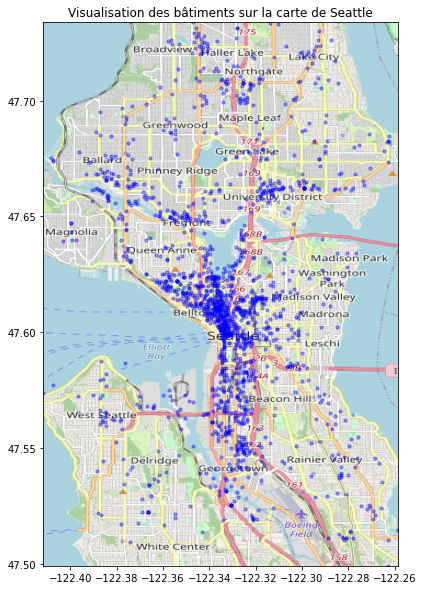

In [144]:
# Affichage des points sur une carte :

# Limites de la carte :
BBox = (data["Longitude"].min(), data["Longitude"].max(),
        data["Latitude"].min(), data["Latitude"].max())

# Importation de la carte :
seattle_map = plt.imread("C:/Users/7700k/Desktop/Openclassrooms/map.png")

# Plotting :
fig, ax = plt.subplots(figsize = (40,10))
ax.scatter(data["Longitude"], data["Latitude"] , zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title("Visualisation des bâtiments sur la carte de Seattle")
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(seattle_map, zorder=0, extent=BBox, aspect= 'equal')

## II - Choix des variables et exploration :

### A - Choix des variables :

#### 1) Corrélation des variables :

<AxesSubplot:>

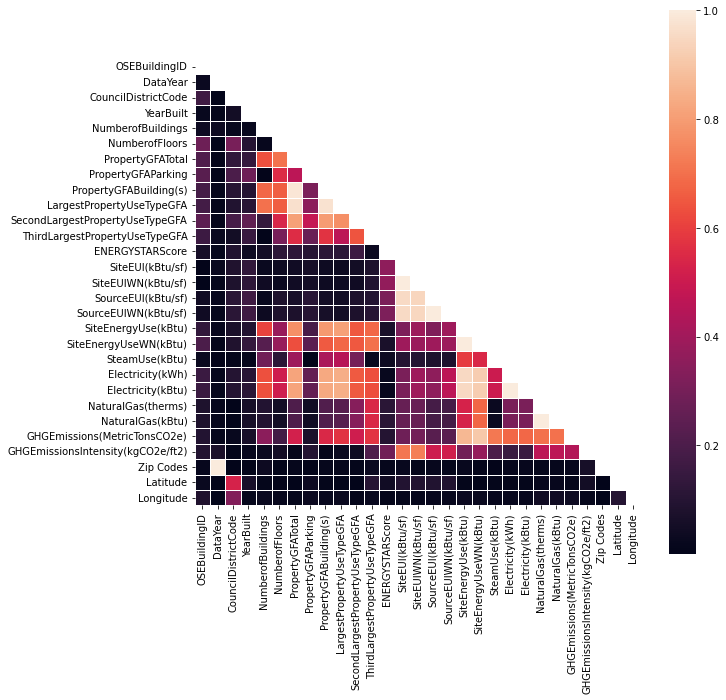

In [145]:
# Matrice de corrélation :
plt.figure(figsize=(10,10))
mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(abs(data.corr()), mask=mask, square=True, linewidth=.5)

#### 2) Approche avec un algorithme d'éliminitation récursive des variables :

In [146]:
# RFECV :
rfecv = RFECV(estimator=LinearRegression(), 
              step=1, 
              cv=5,
              scoring='r2')

X = data.drop(columns=["SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)",
                       "SourceEUIWN(kBtu/sf)","SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)",
                       "SteamUse(kBtu)", "Electricity(kWh)", "Electricity(kBtu)",
                       "NaturalGas(therms)","NaturalGas(kBtu)","GHGEmissions(MetricTonsCO2e)",
                       "GHGEmissionsIntensity(kgCO2e/ft2)"])
X = X.select_dtypes(np.number)
y = data["SiteEnergyUse(kBtu)"]
y2 = data["GHGEmissions(MetricTonsCO2e)"]

rfecv.fit(X.fillna(X.mean()), y.fillna(y.mean()))

RFECV(cv=5, estimator=LinearRegression(), scoring='r2')

In [147]:
# Nombre de variables optimales :
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 16


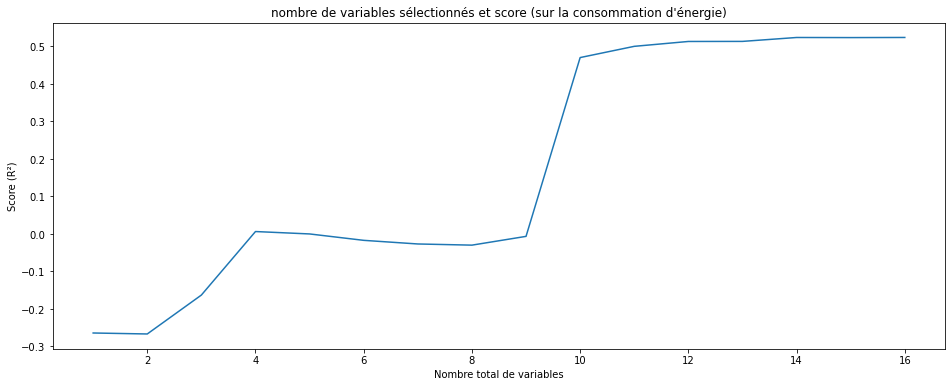

In [148]:
# Visualisation
plt.figure( figsize=(16, 6))
plt.title("nombre de variables sélectionnés et score (sur la consommation d'énergie)")
plt.xlabel("Nombre total de variables")
plt.ylabel("Score (R²)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

In [149]:
# Variables sélectionnés par l'algorithme pour prédire la consommation d'énergie :
selected_features = rfecv.get_support(1)
data[data.columns[selected_features]].columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA'],
      dtype='object')

In [150]:
# Variables sélectionnés par l'algorithme pour prédire l'émission de co2' :
rfecv.fit(X.fillna(X.mean()), y.fillna(y2.mean()))
selected_features = rfecv.get_support(1)
data[data.columns[selected_features]].columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA'],
      dtype='object')

#### 2) Les variables cibles :

#### 3) Les variables explicatives :

#### 4) Une variable témoin :

### B - Dataframe d'analyse et features engineering :

#### 1) Création d'un dataframe d'analyse :

In [151]:
# Variables conservées :
df = data[["OSEBuildingID","LargestPropertyUseType","LargestPropertyUseTypeGFA",
           "SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA",
           "ThirdLargestPropertyUseType", "ThirdLargestPropertyUseTypeGFA", "YearBuilt",
           "DataYear", "Neighborhood","NumberofBuildings","NumberofFloors",
           "PropertyGFATotal", "SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)",
           "ENERGYSTARScore"]].copy()

# Typage de "OSEBuildingID" :
df["OSEBuildingID"] = df["OSEBuildingID"].astype("object")

#### 2) Transformation de la variable "YearBuilt" (année de construction) en âge de la propriété :

In [152]:
# Transformation de la variable "YearBuilt" :
df["YearBuilt"] = df["DataYear"] - df["YearBuilt"]
df.drop(columns="DataYear", inplace=True)

#### 3) Transformation des variables d'usage des bâtiments :

In [153]:
# Transformation des surface utilisée en pourcentage de la surface totale :
df["LargestPropertyUseTypeGFA"] = df["LargestPropertyUseTypeGFA"]/df["PropertyGFATotal"]
df["SecondLargestPropertyUseTypeGFA"] = df["SecondLargestPropertyUseTypeGFA"]/df["PropertyGFATotal"]
df["ThirdLargestPropertyUseTypeGFA"] = df["ThirdLargestPropertyUseTypeGFA"]/df["PropertyGFATotal"]
df["SecondLargestPropertyUseTypeGFA"].replace(np.NaN, 0, inplace=True)
df["ThirdLargestPropertyUseTypeGFA"].replace(np.NaN, 0, inplace=True)

In [154]:
# Création de variables représentant la moyenne de consommation d'énergie par type de bâtiments:

# Calcul des moyennes par type de bâtiments
mean_use_conso_1 = df.groupby("LargestPropertyUseType")["SiteEnergyUse(kBtu)"].mean()
mean_use_conso_2 = df.groupby("SecondLargestPropertyUseType")["SiteEnergyUse(kBtu)"].mean()
mean_use_conso_3 = df.groupby("ThirdLargestPropertyUseType")["SiteEnergyUse(kBtu)"].mean()

# Transformation de la variable initiale
df["LargestPropertyUseType"].replace(mean_use_conso_1.index, mean_use_conso_1.values, inplace=True)
df["SecondLargestPropertyUseType"].replace(mean_use_conso_2, inplace=True)
df["ThirdLargestPropertyUseType"].replace(mean_use_conso_3, inplace=True)
df["LargestPropertyUseType"].replace(np.NaN, 0, inplace=True)
df["SecondLargestPropertyUseType"].replace(np.NaN, 0, inplace=True)
df["ThirdLargestPropertyUseType"].replace(np.NaN, 0, inplace=True)
del(mean_use_conso_1, mean_use_conso_2, mean_use_conso_3)

In [155]:
# Application du coefficient de surface sur les valeurs de consommation moyenne des types de bâtiment :
df["LargestPropertyUseType"] = df["LargestPropertyUseType"] * df["LargestPropertyUseTypeGFA"]
df["SecondLargestPropertyUseType"] = df["SecondLargestPropertyUseType"] * df["SecondLargestPropertyUseTypeGFA"]
df["ThirdLargestPropertyUseType"] = df["ThirdLargestPropertyUseType"] * df["ThirdLargestPropertyUseTypeGFA"]

In [156]:
# Suppression des ratios de surface : 
df = df.drop(columns={"LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"})

#### 4) Renommage des variables :

In [157]:
# Renommage des variables :
df.rename(columns={"OSEBuildingID":"ID", "LargestPropertyUseType":"usage_1",
                   "SecondLargestPropertyUseType":"usage_2", "ThirdLargestPropertyUseType":"usage_3", 
                   "YearBuilt":"age", "Neighborhood":"quartier", "NumberofBuildings":"nbre_batiments", 
                   "NumberofFloors":"nbre_etages","PropertyGFATotal":"surface",
                   "SiteEnergyUse(kBtu)":"conso", "GHGEmissions(MetricTonsCO2e)":"co2",
                   "ENERGYSTARScore":"energystar"},inplace=True)
df.head()

,ID,usage_1,usage_2,usage_3,age,quartier,nbre_batiments,nbre_etages,surface,conso,co2,energystar
0,1,1.213093e+07,0.000000e+00,0.000000,88,Downtown,1.0,12.0,88434,6981428.0,249.43,65.0
1,1,1.213093e+07,0.000000e+00,0.000000,89,Downtown,1.0,12.0,88434,7226362.5,249.98,60.0
2,2,9.825064e+06,2.240493e+06,676693.841531,19,Downtown,1.0,11.0,103566,8354235.0,263.51,51.0
3,2,9.825064e+06,2.240493e+06,676693.841531,20,Downtown,1.0,11.0,103566,8387933.0,295.86,61.0
4,3,9.549021e+06,1.601216e+06,0.000000,46,Downtown,1.0,41.0,961990,73130656.0,2061.48,18.0


#### 6) Corrélations entre les variables sélectionnéees :

<AxesSubplot:>

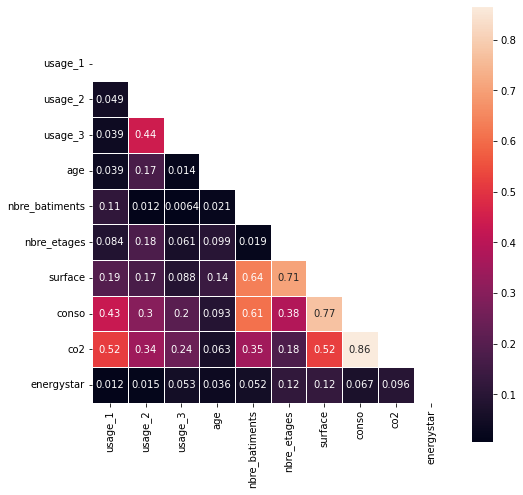

In [158]:
# Matrice de corrélation :
plt.figure(figsize=(8,8))
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(abs(df.corr()), mask=mask, square=True, annot=True, linewidth=.5)

### C- Analyse exploratoire :

#### 1 - Influence de l'usage du bâtiment :

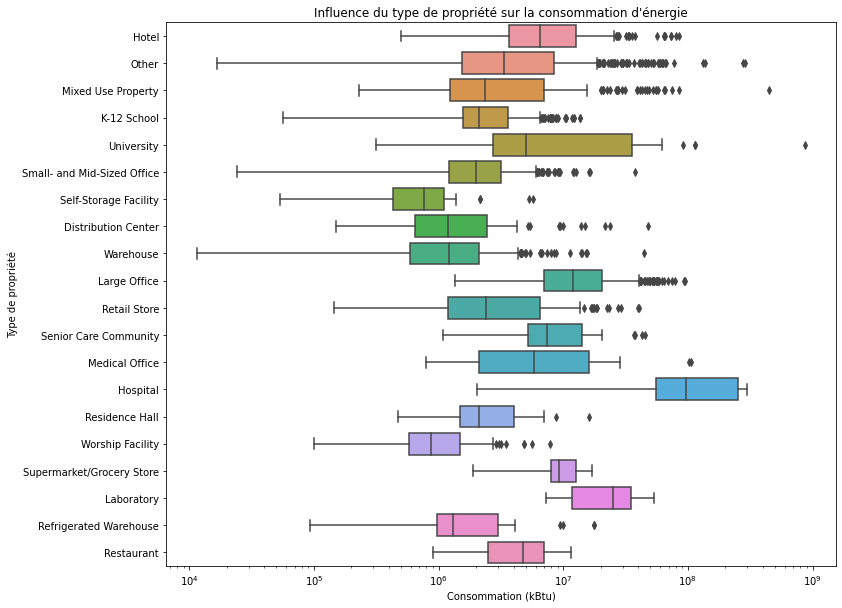

In [159]:
# Influence du type de propriété sur la consommation d'énergie :
plt.figure(figsize=(12,10))
sns.boxplot(x=data["SiteEnergyUse(kBtu)"], y=data["PrimaryPropertyType"])
plt.title("Influence du type de propriété sur la consommation d'énergie")
plt.xlabel("Consommation (kBtu)")
plt.xscale("log")
plt.ylabel("Type de propriété")
plt.show()

In [160]:
# ANOVA :
anova_type_conso = smf.ols("conso  ~ usage_1", data=df).fit()
anova_type_conso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  conso   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     732.8
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.18e-145
Time:                        19:26:43   Log-Likelihood:                -59501.
No. Observations:                3240   AIC:                         1.190e+05
Df Residuals:                    3238   BIC:                         1.190e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.827e+06   4.46e+05      6.337      0.000    1.95e+06     3.7e+06
usage_1        0.7404      0.027     27.070      0.000       0.687       0.794
==============================================================================
Omnibus:                     7025.421   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         52811748.854
Skew:                          18.886   Prob(JB):                         0.00
Kurtosis:                     627.317   Cond. No.                     1.81e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

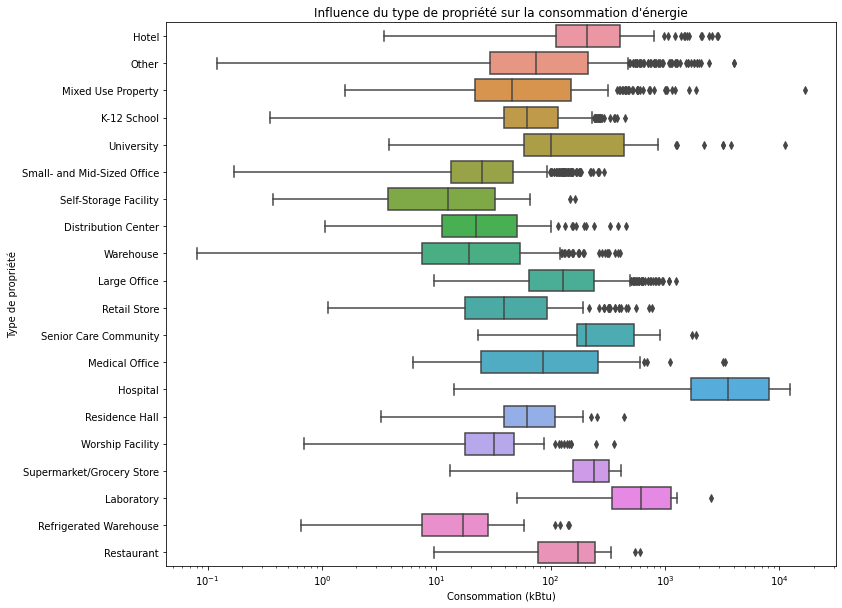

In [161]:
# Influence du type de propriété sur la consommation d'énergie :
plt.figure(figsize=(12,10))
sns.boxplot(x=data["GHGEmissions(MetricTonsCO2e)"], y=data["PrimaryPropertyType"])
plt.title("Influence du type de propriété sur la consommation d'énergie")
plt.xlabel("Consommation (kBtu)")
plt.xscale("log")
plt.ylabel("Type de propriété")
plt.show()

In [162]:
# ANOVA :
anova_type_emissions = smf.ols("co2  ~ usage_1", data=df).fit()
anova_type_emissions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1183.
Date:                Sat, 14 May 2022   Prob (F-statistic):          2.71e-221
Time:                        19:26:44   Log-Likelihood:                -25227.
No. Observations:                3249   AIC:                         5.046e+04
Df Residuals:                    3247   BIC:                         5.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7383     11.099      0.968      0.333     -11.023      32.500
usage_1     2.344e-05   6.81e-07     34.391      0.000    2.21e-05    2.48e-05
==============================================================================
Omnibus:                     5902.953   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13791967.894
Skew:                          12.865   Prob(JB):                         0.00
Kurtosis:                     321.147   Cond. No.                     1.81e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2) Influence du quartier :

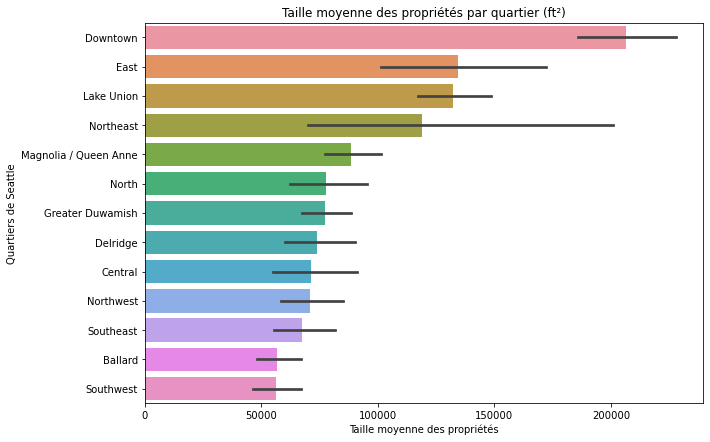

In [163]:
# Taille moyenne des propriétés par quartier :
plt.figure(figsize=(10,7))
sns.barplot(x=df["surface"], y=df["quartier"], orient="h", 
            order=df.groupby("quartier").mean()["surface"].sort_values(ascending=False).index)
plt.title("Taille moyenne des propriétés par quartier (ft²)")
plt.ylabel("Quartiers de Seattle")
plt.xlabel("Taille moyenne des propriétés")
plt.show()

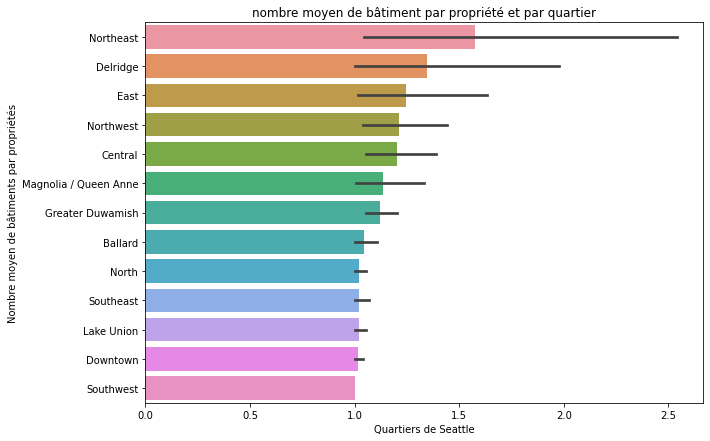

In [164]:
# Nombre moyen de bâtiment par propriété et par quartier :
plt.figure(figsize=(10,7))
sns.barplot(x=df["nbre_batiments"], y=df["quartier"], orient="h", 
            order=df.groupby("quartier").mean()["nbre_batiments"].sort_values(ascending=False).index)
plt.title("nombre moyen de bâtiment par propriété et par quartier")
plt.xlabel("Quartiers de Seattle")
plt.ylabel("Nombre moyen de bâtiments par propriétés")
plt.show()

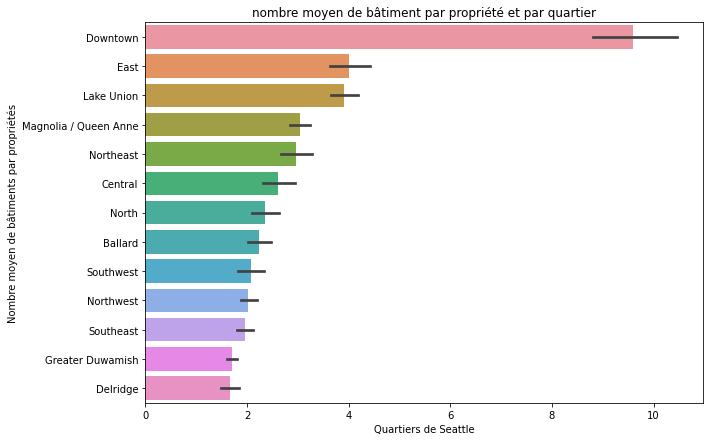

In [165]:
# Nombre moyen d'étages par propriété et par quartier :
plt.figure(figsize=(10,7))
sns.barplot(x=df["nbre_etages"], y=df["quartier"], orient="h", 
            order=df.groupby("quartier").mean()["nbre_etages"].sort_values(ascending=False).index)
plt.title("nombre moyen de bâtiment par propriété et par quartier")
plt.xlabel("Quartiers de Seattle")
plt.ylabel("Nombre moyen de bâtiments par propriétés")
plt.show()

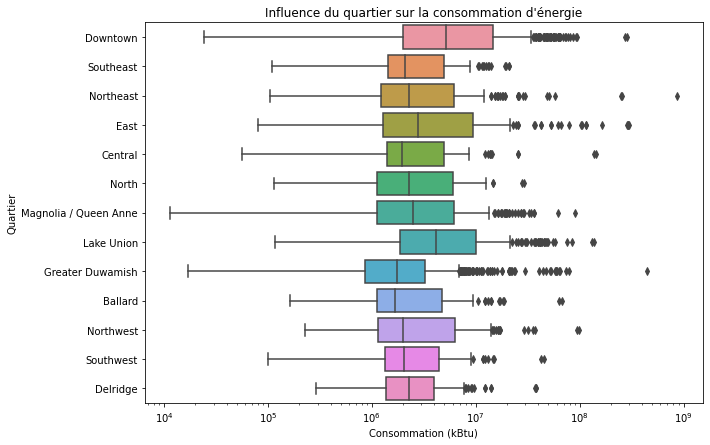

In [166]:
# Influence du quartier sur la consommation d'énergie :
plt.figure(figsize=(10,7))
sns.boxplot(x=df["conso"], y=df["quartier"])
plt.title("Influence du quartier sur la consommation d'énergie")
plt.xlabel("Consommation (kBtu)")
plt.xscale("log")
plt.ylabel("Quartier")
plt.show()

In [167]:
# ANOVA :
anova_quartier_conso = smf.ols("conso  ~ quartier", data=df).fit()
anova_quartier_conso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  conso   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.673
Date:                Sat, 14 May 2022   Prob (F-statistic):           9.49e-10
Time:                        19:26:46   Log-Likelihood:                -59798.
No. Observations:                3240   AIC:                         1.196e+05
Df Residuals:                    3227   BIC:                         1.197e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          4.274e+06   2.16e+06      1.977      0.048    3.52e+04    8.51e+06
quartier[T.Central]                2.044e+06   3.27e+06      0.625      0.532   -4.37e+06    8.45e+06
quartier[T.Delridge]               1.872e+05   3.41e+06      0.055      0.956   -6.49e+06    6.87e+06
quartier[T.Downtown]               7.971e+06   2.36e+06      3.379      0.001    3.35e+06    1.26e+07
quartier[T.East]                   9.884e+06   2.71e+06      3.646      0.000    4.57e+06    1.52e+07
quartier[T.Greater Duwamish]       2.151e+05   2.37e+06      0.091      0.928   -4.42e+06    4.85e+06
quartier[T.Lake Union]             5.791e+06   2.63e+06      2.205      0.028    6.42e+05    1.09e+07
quartier[T.Magnolia / Queen Anne]  1.393e+06   2.62e+06      0.533      0.594   -3.74e+06    6.52e+06
quartier[T.North]                 -1.176e+04   3.09e+06     -0.004      0.997   -6.08e+06    6.05e+06
quartier[T.Northeast]              6.567e+06   2.71e+06      2.426      0.015    1.26e+06    1.19e+07
quartier[T.Northwest]              1.506e+06    2.9e+06      0.520      0.603   -4.17e+06    7.18e+06
quartier[T.Southeast]             -3.853e+04   3.43e+06     -0.011      0.991   -6.76e+06    6.69e+06
quartier[T.Southwest]               3.83e+05   3.54e+06      0.108      0.914   -6.57e+06    7.33e+06
==============================================================================
Omnibus:                     6830.118   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33248032.098
Skew:                          17.853   Prob(JB):                         0.00
Kurtosis:                     497.982   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

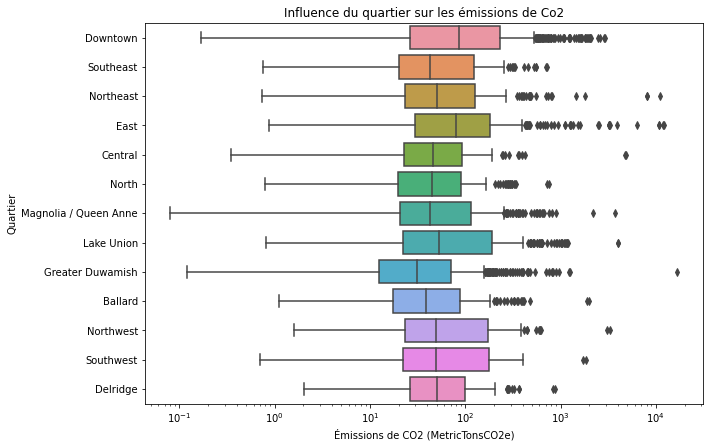

In [168]:
# Influence du quartier sur les émissions de CO2 :
plt.figure(figsize=(10,7))
sns.boxplot(x=df["co2"], y=df["quartier"])
plt.title("Influence du quartier sur les émissions de Co2")
plt.xlabel("Émissions de CO2 (MetricTonsCO2e)")
plt.xscale("log")
plt.ylabel("Quartier")
plt.show()

In [169]:
# ANOVA :
anova_quartier_emissions = smf.ols("co2  ~ quartier", data=df).fit()
anova_quartier_emissions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.941
Date:                Sat, 14 May 2022   Prob (F-statistic):           2.45e-10
Time:                        19:26:46   Log-Likelihood:                -25697.
No. Observations:                3249   AIC:                         5.142e+04
Df Residuals:                    3236   BIC:                         5.150e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           107.5346     56.381      1.907      0.057      -3.012     218.081
quartier[T.Central]                  56.7874     85.141      0.667      0.505    -110.148     223.722
quartier[T.Delridge]                 -9.6896     88.952     -0.109      0.913    -184.098     164.719
quartier[T.Downtown]                108.2039     61.581      1.757      0.079     -12.538     228.945
quartier[T.East]                    366.0963     70.881      5.165      0.000     227.119     505.073
quartier[T.Greater Duwamish]        -14.3248     61.785     -0.232      0.817    -135.467     106.817
quartier[T.Lake Union]               83.8245     68.607      1.222      0.222     -50.693     218.342
quartier[T.Magnolia / Queen Anne]    14.2548     68.339      0.209      0.835    -119.738     148.248
quartier[T.North]                   -17.7669     80.962     -0.219      0.826    -176.508     140.975
quartier[T.Northeast]               119.6725     70.772      1.691      0.091     -19.090     258.435
quartier[T.Northwest]                39.5623     75.767      0.522      0.602    -108.993     188.118
quartier[T.Southeast]                 4.1625     89.542      0.046      0.963    -171.402     179.727
quartier[T.Southwest]                32.9101     92.495      0.356      0.722    -148.445     214.265
==============================================================================
Omnibus:                     6129.003   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9561167.342
Skew:                          14.268   Prob(JB):                         0.00
Kurtosis:                     267.221   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# Suppressions des ANOVA :
del(anova_quartier_conso, anova_quartier_emissions, anova_type_conso, anova_type_emissions)

#### 3) Influence de la date de construction :

<Figure size 432x288 with 0 Axes>

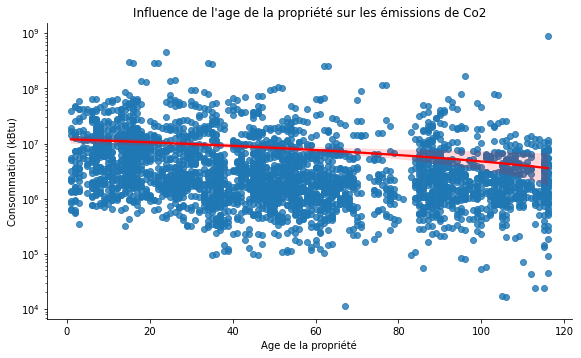

In [171]:
# Influence de l'age de la propriété sur la consommation d'énergie :
plt.figure()
sns.lmplot(x="age", y="conso", data=df, line_kws={'color': "red"}, height=5, aspect=1.6)
plt.title("Influence de l'age de la propriété sur les émissions de Co2")
plt.xlabel("Age de la propriété")
plt.ylabel("Consommation (kBtu)")
plt.yscale("log")
plt.show()

In [172]:
# Test de corrélation (Pearson)
stats.pearsonr(np.log(df["age"]), 
               df["conso"].fillna(df["conso"].mean()))

(-0.09212765311233967, 1.381194855218322e-07)

In [173]:
# Test de corrélation (Spearman)
stats.spearmanr(np.log(df["age"]), 
                df["conso"].fillna(df["conso"].mean()))

SpearmanrResult(correlation=-0.2751267874821909, pvalue=1.1269974843823058e-57)

<Figure size 432x288 with 0 Axes>

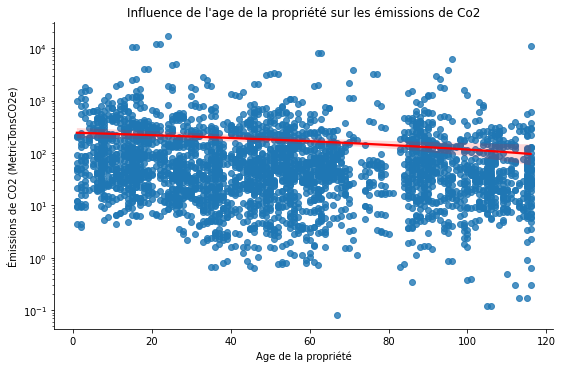

In [174]:
# Influence de la date de construction sur les émissions de CO2 :
plt.figure()
sns.lmplot(x="age", y="co2", data=df, line_kws={'color': "red"}, height=5, aspect=1.6)
plt.title("Influence de l'age de la propriété sur les émissions de Co2")
plt.xlabel("Age de la propriété")
plt.ylabel("Émissions de CO2 (MetricTonsCO2e)")
plt.yscale("log")
plt.show()

In [175]:
# Test de corrélation (Pearson)
stats.pearsonr(np.log(df["age"]), 
               df["co2"].fillna(df["co2"].mean()))

(-0.060360406252234086, 0.0005665836861005785)

In [176]:
# Test de corrélation (Spearman)
stats.spearmanr(np.log(df["age"]), 
                df["co2"].fillna(df["co2"].mean()))

SpearmanrResult(correlation=-0.1603544232112474, pvalue=3.292038936690805e-20)

#### 4) Analyse du score Energystar :

<Figure size 432x288 with 0 Axes>

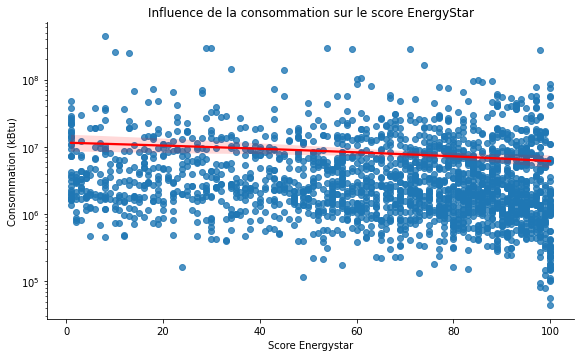

In [177]:
# Influence de la consommation d'énergie sur le score EnergyStar :
plt.figure()
sns.lmplot(x="energystar", y="conso", data=df, line_kws={'color': "red"}, height=5, aspect=1.6)
plt.title("Influence de la consommation sur le score EnergyStar")
plt.xlabel("Score Energystar")
plt.ylabel("Consommation (kBtu)")
plt.yscale("log")
plt.show()

In [178]:
# Test de corrélation (Pearson)
stats.pearsonr(np.log(df["energystar"].fillna(df["energystar"].mean())), 
               df["conso"].fillna(df["conso"].mean()))

(-0.04011364075194153, 0.02203957681133475)

In [179]:
# Test de corrélation (Spearman)
stats.spearmanr(np.log(df["energystar"].fillna(df["energystar"].mean())), 
                df["conso"].fillna(df["conso"].mean()))

SpearmanrResult(correlation=-0.12341513779302174, pvalue=1.5635357471869068e-12)

<Figure size 432x288 with 0 Axes>

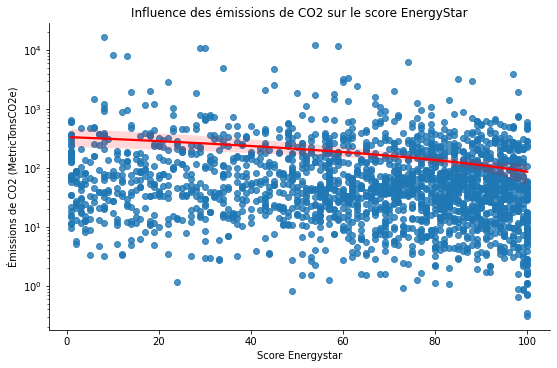

In [180]:
# Influence des émissions de CO2 sur le score EnergyStar :
plt.figure()
sns.lmplot(x="energystar", y="co2", data=df, line_kws={'color': "red"}, height=5, aspect=1.6)
plt.title("Influence des émissions de CO2 sur le score EnergyStar")
plt.xlabel("Score Energystar")
plt.ylabel("Émissions de CO2 (MetricTonsCO2e)")
plt.yscale("log")
plt.show()

In [181]:
# Test de corrélation (Pearson)
stats.pearsonr(np.log(df["energystar"].fillna(df["energystar"].mean())), 
               df["co2"].fillna(df["co2"].mean()))

(-0.05977115608009316, 0.000641543647354008)

In [182]:
# Test de corrélation (Spearman)
stats.spearmanr(np.log(df["energystar"].fillna(df["energystar"].mean())), 
                df["co2"].fillna(df["co2"].mean()))

SpearmanrResult(correlation=-0.10129269560216893, pvalue=6.858048446957627e-09)

<Figure size 432x288 with 0 Axes>

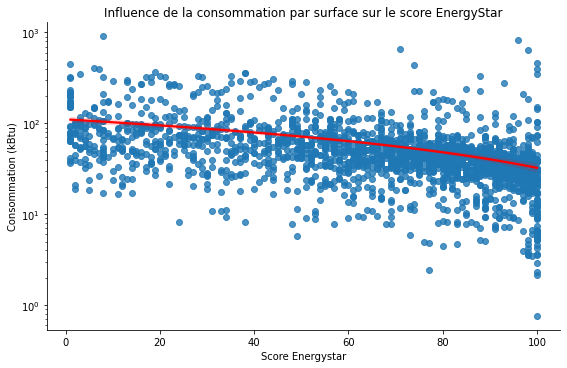

In [183]:
# Influence de la consommation d'énergie / surface sur le score EnergyStar :
df["conso_surface"] = df["conso"]/df["surface"]

plt.figure()
sns.lmplot(x="energystar", y="conso_surface", data=df, line_kws={'color': "red"}, height=5, aspect=1.6)
plt.title("Influence de la consommation par surface sur le score EnergyStar")
plt.xlabel("Score Energystar")
plt.ylabel("Consommation (kBtu)")
plt.yscale("log")
plt.show()

In [184]:
# Test de corrélation (Pearson)
stats.pearsonr(np.log(df["energystar"].fillna(df["energystar"].mean())), 
               df["conso_surface"].fillna(df["conso_surface"].mean()))

(-0.22161588336990518, 1.551813671313302e-37)

In [185]:
# Test de corrélation (Spearman)
stats.spearmanr(np.log(df["energystar"].fillna(df["energystar"].mean())), 
                df["conso_surface"].fillna(df["conso_surface"].mean()))

SpearmanrResult(correlation=-0.39548613386833864, pvalue=1.951081803366286e-122)

<Figure size 432x288 with 0 Axes>

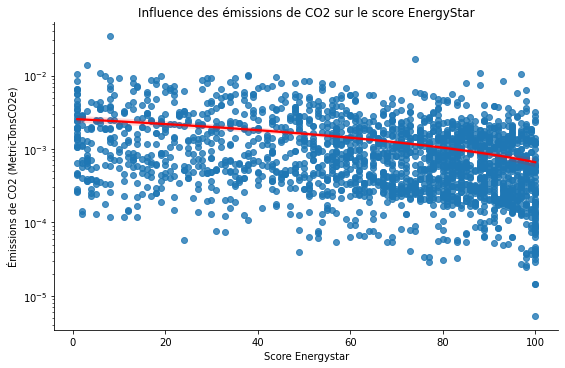

In [186]:
# Influence des émissions de CO2 par surface sur le score EnergyStar :
df["co2_surface"] = df["co2"]/df["surface"]

plt.figure()
sns.lmplot(x="energystar", y="co2_surface", data=df, line_kws={'color': "red"}, height=5, aspect=1.6)
plt.title("Influence des émissions de CO2 sur le score EnergyStar")
plt.xlabel("Score Energystar")
plt.ylabel("Émissions de CO2 (MetricTonsCO2e)")
plt.yscale("log")
plt.show()

In [187]:
# Test de corrélation (Pearson)
stats.pearsonr(np.log(df["energystar"].fillna(df["energystar"].mean())), 
               df["co2_surface"].fillna(df["co2_surface"].mean()))

(-0.15106419208166733, 4.357008527546197e-18)

In [188]:
# Test de corrélation (Pearson)
stats.spearmanr(np.log(df["energystar"].fillna(df["energystar"].mean())), 
                df["co2_surface"].fillna(df["co2_surface"].mean()))

SpearmanrResult(correlation=-0.2631467198553364, pvalue=9.697940885877362e-53)

In [189]:
# Suppression des variables "conso_surface" et "co2_surface" !
del(df["co2_surface"], df["conso_surface"])

#### 5) Analyses multivariées :

##### -  -  -  -  -  -  -  -  -  -  Consommation d'énergie expliquée par les variables sélectionnées  -  -  -  -  -  -  -  -  -  - 

In [190]:
# ANOVA Consommation d'énergie expliquée :
anova_multi_conso = smf.ols("conso ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface" 
                            ,data=df).fit()
anova_multi_conso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  conso   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     290.4
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:50   Log-Likelihood:                -56020.
No. Observations:                3158   AIC:                         1.121e+05
Df Residuals:                    3138   BIC:                         1.122e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -5.604e+06   1.17e+06     -4.793      0.000    -7.9e+06   -3.31e+06
quartier[T.Central]               -5.753e+05    1.6e+06     -0.359      0.720   -3.72e+06    2.57e+06
quartier[T.Delridge]               1.356e+06   1.69e+06      0.803      0.422   -1.96e+06    4.67e+06
quartier[T.Downtown]              -1.294e+06   1.21e+06     -1.068      0.286   -3.67e+06    1.08e+06
quartier[T.East]                   5.225e+05   1.35e+06      0.386      0.699   -2.13e+06    3.17e+06
quartier[T.Greater Duwamish]       4.549e+05   1.16e+06      0.392      0.695   -1.82e+06    2.73e+06
quartier[T.Lake Union]            -2.408e+06    1.3e+06     -1.846      0.065   -4.97e+06     1.5e+05
quartier[T.Magnolia / Queen Anne] -1.123e+06   1.28e+06     -0.874      0.382   -3.64e+06     1.4e+06
quartier[T.North]                  4.033e+05   1.52e+06      0.264      0.791   -2.59e+06    3.39e+06
quartier[T.Northeast]              9.686e+05   1.34e+06      0.724      0.469   -1.66e+06    3.59e+06
quartier[T.Northwest]              5.432e+05   1.42e+06      0.382      0.703   -2.25e+06    3.33e+06
quartier[T.Southeast]              1.473e+06    1.7e+06      0.866      0.386   -1.86e+06    4.81e+06
quartier[T.Southwest]             -1.826e+05   1.75e+06     -0.104      0.917   -3.61e+06    3.24e+06
usage_1                               0.6106      0.016     37.149      0.000       0.578       0.643
usage_2                               1.7158      0.107     16.074      0.000       1.506       1.925
usage_3                               3.3024      0.302     10.933      0.000       2.710       3.895
age                                1.018e+04   7607.699      1.338      0.181   -4740.598    2.51e+04
nbre_batiments                     5.744e+05    2.1e+05      2.742      0.006    1.64e+05    9.85e+05
nbre_etages                       -1.284e+05   5.84e+04     -2.200      0.028   -2.43e+05    -1.4e+04
surface                              52.8823      1.838     28.772      0.000      49.279      56.486
==============================================================================
Omnibus:                     4090.878   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2117164.081
Skew:                           6.680   Prob(JB):                         0.00
Kurtosis:                     129.141   Cond. No.                     2.83e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### - - - - - - - - - - Consommation d'énergie expliquée par variables sélectionnées (logarithmes)  - - - - - - - - - -¶

In [191]:
# ANOVA Consommation d'énergie expliquée (log) :
df_log = df.copy().replace(0,np.NaN)
for c in df_log.select_dtypes(np.number).columns:
    df_log[c] = np.log(df_log[c])

anova_multi_conso_log = smf.ols("conso  ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface" 
                                ,data=df_log).fit()
anova_multi_conso_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  conso   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sat, 14 May 2022   Prob (F-statistic):          8.59e-173
Time:                        19:26:50   Log-Likelihood:                -565.82
No. Observations:                 604   AIC:                             1172.
Df Residuals:                     584   BIC:                             1260.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.8491      0.927     -3.074      0.002      -4.669      -1.029
quartier[T.Central]                  -0.2495      0.237     -1.054      0.292      -0.715       0.216
quartier[T.Delridge]                  0.3185      0.345      0.924      0.356      -0.358       0.995
quartier[T.Downtown]                 -0.0371      0.148     -0.250      0.803      -0.328       0.254
quartier[T.East]                     -0.2538      0.167     -1.516      0.130      -0.582       0.075
quartier[T.Greater Duwamish]         -0.2211      0.153     -1.444      0.149      -0.522       0.080
quartier[T.Lake Union]               -0.0700      0.158     -0.442      0.659      -0.381       0.241
quartier[T.Magnolia / Queen Anne]     0.0020      0.170      0.012      0.991      -0.332       0.336
quartier[T.North]                    -0.5904      0.224     -2.633      0.009      -1.031      -0.150
quartier[T.Northeast]                 0.0685      0.185      0.370      0.711      -0.295       0.432
quartier[T.Northwest]                -0.4851      0.228     -2.130      0.034      -0.932      -0.038
quartier[T.Southeast]                 0.2802      0.269      1.042      0.298      -0.248       0.808
quartier[T.Southwest]                 0.6247      0.313      1.996      0.046       0.010       1.239
usage_1                               0.2988      0.041      7.217      0.000       0.217       0.380
usage_2                               0.1141      0.032      3.598      0.000       0.052       0.176
usage_3                               0.1133      0.025      4.500      0.000       0.064       0.163
age                                   0.0106      0.034      0.311      0.756      -0.057       0.078
nbre_batiments                        0.1997      0.139      1.435      0.152      -0.074       0.473
nbre_etages                          -0.0562      0.050     -1.122      0.262      -0.154       0.042
surface                               0.9339      0.042     22.437      0.000       0.852       1.016
==============================================================================
Omnibus:                        8.036   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.926
Skew:                           0.196   Prob(JB):                       0.0115
Kurtosis:                       3.448   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### - - - - - - - - - - Consommation d'énergie expliquée par variables sélectionnées + l'EnergyStarScore  - - - - - - - - - -¶

In [192]:
# ANOVA Consommation d'énergie expliquée :
anova_multi_conso = smf.ols("conso ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface + energystar" 
                            ,data=df).fit()
anova_multi_conso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  conso   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     250.2
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:50   Log-Likelihood:                -37963.
No. Observations:                2138   AIC:                         7.597e+04
Df Residuals:                    2117   BIC:                         7.609e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                         -8.288e+06   1.74e+06     -4.758      0.000   -1.17e+07   -4.87e+06
quartier[T.Central]               -2.577e+05   2.03e+06     -0.127      0.899   -4.24e+06    3.72e+06
quartier[T.Delridge]                1.74e+06   2.08e+06      0.838      0.402   -2.33e+06    5.81e+06
quartier[T.Downtown]               -1.68e+06   1.57e+06     -1.070      0.285   -4.76e+06     1.4e+06
quartier[T.East]                   1.597e+06   1.77e+06      0.904      0.366   -1.87e+06    5.06e+06
quartier[T.Greater Duwamish]       -3.36e+05   1.49e+06     -0.225      0.822   -3.26e+06    2.59e+06
quartier[T.Lake Union]            -3.577e+06   1.64e+06     -2.184      0.029   -6.79e+06   -3.65e+05
quartier[T.Magnolia / Queen Anne] -1.348e+06   1.66e+06     -0.814      0.416   -4.59e+06     1.9e+06
quartier[T.North]                  1.337e+06   1.95e+06      0.685      0.493   -2.49e+06    5.16e+06
quartier[T.Northeast]              8.364e+05   1.68e+06      0.497      0.619   -2.47e+06    4.14e+06
quartier[T.Northwest]              9.373e+05   1.77e+06      0.530      0.596   -2.53e+06    4.41e+06
quartier[T.Southeast]              1.873e+06   2.04e+06      0.919      0.358   -2.12e+06    5.87e+06
quartier[T.Southwest]              2.844e+05   2.21e+06      0.129      0.898   -4.06e+06    4.62e+06
usage_1                               0.5837      0.019     30.745      0.000       0.546       0.621
usage_2                               1.5279      0.133     11.494      0.000       1.267       1.789
usage_3                               6.2655      0.469     13.354      0.000       5.345       7.186
age                                2.665e+04   9885.513      2.695      0.007    7259.188     4.6e+04
nbre_batiments                     7.784e+06   8.19e+05      9.509      0.000    6.18e+06    9.39e+06
nbre_etages                       -1.799e+05   7.15e+04     -2.516      0.012    -3.2e+05   -3.97e+04
surface                              54.5042      2.492     21.871      0.000      49.617      59.391
energystar                         -7.84e+04   9899.578     -7.919      0.000   -9.78e+04    -5.9e+04
==============================================================================
Omnibus:                     2820.051   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1771515.881
Skew:                           6.751   Prob(JB):                         0.00
Kurtosis:                     143.370   Cond. No.                     3.24e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+08. This might indic

##### - - - - - - - - - - Consommation d'énergie expliquée par variables sélectionnées + l'EnergyStarScore (logarithmes)  - - - - - - - - - -¶

In [193]:
# ANOVA Consommation d'énergie expliquée :
anova_multi_conso = smf.ols("conso ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface + energystar" 
                            ,data=df_log).fit()
anova_multi_conso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  conso   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sat, 14 May 2022   Prob (F-statistic):          6.28e-112
Time:                        19:26:50   Log-Likelihood:                -136.94
No. Observations:                 277   AIC:                             311.9
Df Residuals:                     258   BIC:                             380.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -3.6275      1.152     -3.149      0.002      -5.896      -1.359
quartier[T.Central]                  -1.7038      0.468     -3.638      0.000      -2.626      -0.782
quartier[T.Delridge]                 -1.0290      0.476     -2.160      0.032      -1.967      -0.091
quartier[T.Downtown]                 -1.2277      0.426     -2.883      0.004      -2.066      -0.389
quartier[T.East]                     -0.9058      0.446     -2.030      0.043      -1.784      -0.027
quartier[T.Greater Duwamish]         -1.3086      0.423     -3.095      0.002      -2.141      -0.476
quartier[T.Lake Union]               -1.0998      0.421     -2.609      0.010      -1.930      -0.270
quartier[T.Magnolia / Queen Anne]    -1.1397      0.431     -2.644      0.009      -1.989      -0.291
quartier[T.North]                    -1.1577      0.508     -2.278      0.024      -2.159      -0.157
quartier[T.Northeast]                -1.2879      0.454     -2.839      0.005      -2.181      -0.395
quartier[T.Northwest]                -0.7928      0.464     -1.709      0.089      -1.707       0.121
quartier[T.Southeast]                -1.2033      0.510     -2.360      0.019      -2.208      -0.199
quartier[T.Southwest]             -6.117e-16   3.76e-16     -1.627      0.105   -1.35e-15    1.29e-16
usage_1                               0.4724      0.050      9.386      0.000       0.373       0.572
usage_2                               0.0657      0.033      2.019      0.045       0.002       0.130
usage_3                               0.0864      0.026      3.356      0.001       0.036       0.137
age                                   0.1159      0.033      3.494      0.001       0.051       0.181
nbre_batiments                     9.083e-17   5.63e-17      1.614      0.108      -2e-17    2.02e-16
nbre_etages                          -0.0534      0.047     -1.141      0.255      -0.146       0.039
surface                               1.0404      0.040     25.804      0.000       0.961       1.120
energystar                           -0.3495      0.036     -9.599      0.000      -0.421      -0.278
==============================================================================
Omnibus:                       68.285   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.455
Skew:                           1.010   Prob(JB):                     3.70e-53
Kurtosis:                       7.104   Cond. No.                     2.42e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.82e-34. This might indicate 

##### - - - - - - - - - - Émissions de CO2 expliquée les par variables sélectionnées - - - - - - - - - -¶

In [194]:
# ANOVA émissions CO2 expliquées :
anova_multi_emissions = smf.ols("co2  ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface"
                                ,data=df).fit()
anova_multi_emissions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:50   Log-Likelihood:                -23702.
No. Observations:                3167   AIC:                         4.744e+04
Df Residuals:                    3147   BIC:                         4.756e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -204.2014     40.872     -4.996      0.000    -284.340    -124.063
quartier[T.Central]                 -19.6642     55.930     -0.352      0.725    -129.327      89.998
quartier[T.Delridge]                 38.2273     59.036      0.648      0.517     -77.527     153.981
quartier[T.Downtown]                -44.5168     42.379     -1.050      0.294    -127.610      38.576
quartier[T.East]                     88.7478     47.364      1.874      0.061      -4.120     181.615
quartier[T.Greater Duwamish]         -7.2966     40.595     -0.180      0.857     -86.891      72.298
quartier[T.Lake Union]             -139.4079     45.638     -3.055      0.002    -228.891     -49.925
quartier[T.Magnolia / Queen Anne]   -42.6629     44.930     -0.950      0.342    -130.757      45.431
quartier[T.North]                    12.8747     53.439      0.241      0.810     -91.905     117.654
quartier[T.Northeast]                26.3805     46.874      0.563      0.574     -65.526     118.287
quartier[T.Northwest]                15.3182     49.878      0.307      0.759     -82.479     113.116
quartier[T.Southeast]                66.1475     59.404      1.114      0.266     -50.328     182.623
quartier[T.Southwest]                10.0814     61.047      0.165      0.869    -109.615     129.778
usage_1                            2.133e-05   5.78e-07     36.902      0.000    2.02e-05    2.25e-05
usage_2                            6.257e-05   3.75e-06     16.672      0.000    5.52e-05    6.99e-05
usage_3                               0.0001   1.06e-05     10.127      0.000    8.68e-05       0.000
age                                   1.0432      0.268      3.898      0.000       0.518       1.568
nbre_batiments                       10.3823      7.369      1.409      0.159      -4.066      24.831
nbre_etages                         -22.1811      2.053    -10.802      0.000     -26.207     -18.155
surface                               0.0015   6.46e-05     23.160      0.000       0.001       0.002
==============================================================================
Omnibus:                     3989.010   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2109204.287
Skew:                           6.305   Prob(JB):                         0.00
Kurtosis:                     128.797   Cond. No.                     2.81e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 ##### - - - - - - - - - - Émissions de CO2 expliquée les par variables sélectionnées (logarithmes) - - - - - - - - - -

In [195]:
# ANOVA émissions CO2 expliquées (log) :
anova_multi_emissions_log = smf.ols("co2  ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface"
                                    ,data=df_log).fit()
anova_multi_emissions_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     29.01
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.08e-71
Time:                        19:26:51   Log-Likelihood:                -861.04
No. Observations:                 603   AIC:                             1762.
Df Residuals:                     583   BIC:                             1850.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -11.9833      1.515     -7.909      0.000     -14.959      -9.007
quartier[T.Central]                  -0.5057      0.387     -1.307      0.192      -1.266       0.254
quartier[T.Delridge]                  0.0916      0.563      0.163      0.871      -1.015       1.198
quartier[T.Downtown]                 -0.2965      0.242     -1.224      0.221      -0.772       0.179
quartier[T.East]                     -0.1046      0.273     -0.382      0.702      -0.642       0.433
quartier[T.Greater Duwamish]         -0.4380      0.250     -1.751      0.081      -0.929       0.053
quartier[T.Lake Union]               -0.2213      0.259     -0.855      0.393      -0.730       0.287
quartier[T.Magnolia / Queen Anne]    -0.0730      0.279     -0.261      0.794      -0.621       0.475
quartier[T.North]                    -0.8588      0.367     -2.343      0.019      -1.579      -0.139
quartier[T.Northeast]                 0.0260      0.303      0.086      0.931      -0.569       0.621
quartier[T.Northwest]                -0.5907      0.372     -1.587      0.113      -1.322       0.140
quartier[T.Southeast]                 0.5860      0.439      1.334      0.183      -0.277       1.449
quartier[T.Southwest]                 1.0674      0.512      2.087      0.037       0.063       2.072
usage_1                               0.2160      0.068      3.188      0.002       0.083       0.349
usage_2                               0.0909      0.052      1.754      0.080      -0.011       0.193
usage_3                               0.1399      0.041      3.398      0.001       0.059       0.221
age                                   0.0626      0.056      1.117      0.264      -0.047       0.173
nbre_batiments                        0.1746      0.227      0.768      0.443      -0.272       0.621
nbre_etages                          -0.0482      0.082     -0.588      0.557      -0.209       0.113
surface                               0.8659      0.068     12.726      0.000       0.732       1.000
==============================================================================
Omnibus:                        3.161   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                3.149
Skew:                           0.143   Prob(JB):                        0.207
Kurtosis:                       2.792   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### - - - - - - - - - - Émissions de CO2 expliquée par les variables sélectionnées + l'EnergyStarScore - - - - - - - - - -

In [196]:
# ANOVA émissions CO2 expliquées (log) :
anova_multi_emissions_log = smf.ols("co2  ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface + energystar"
                                    ,data=df).fit()
anova_multi_emissions_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     201.5
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:51   Log-Likelihood:                -15998.
No. Observations:                2136   AIC:                         3.204e+04
Df Residuals:                    2115   BIC:                         3.216e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -387.0080     60.555     -6.391      0.000    -505.761    -268.255
quartier[T.Central]                 -13.1010     70.876     -0.185      0.853    -152.095     125.893
quartier[T.Delridge]                 49.4385     72.171      0.685      0.493     -92.095     190.972
quartier[T.Downtown]                -45.4166     54.566     -0.832      0.405    -152.426      61.593
quartier[T.East]                    144.9123     61.437      2.359      0.018      24.428     265.397
quartier[T.Greater Duwamish]        -17.3029     51.874     -0.334      0.739    -119.031      84.426
quartier[T.Lake Union]             -165.5775     56.934     -2.908      0.004    -277.231     -53.925
quartier[T.Magnolia / Queen Anne]   -41.0145     57.588     -0.712      0.476    -153.949      71.920
quartier[T.North]                    45.8151     67.785      0.676      0.499     -87.118     178.748
quartier[T.Northeast]                29.9044     58.525      0.511      0.609     -84.868     144.677
quartier[T.Northwest]                42.5257     61.500      0.691      0.489     -78.081     163.132
quartier[T.Southeast]                86.4247     70.834      1.220      0.223     -52.487     225.337
quartier[T.Southwest]                36.6477     76.919      0.476      0.634    -114.197     187.492
usage_1                            2.001e-05    6.6e-07     30.326      0.000    1.87e-05    2.13e-05
usage_2                            5.646e-05   4.62e-06     12.211      0.000    4.74e-05    6.55e-05
usage_3                               0.0002   1.63e-05     13.514      0.000       0.000       0.000
age                                   1.7620      0.344      5.121      0.000       1.087       2.437
nbre_batiments                      325.6535     28.454     11.445      0.000     269.853     381.454
nbre_etages                         -26.5283      2.486    -10.670      0.000     -31.404     -21.653
surface                               0.0017   8.67e-05     19.208      0.000       0.001       0.002
energystar                           -2.5489      0.344     -7.401      0.000      -3.224      -1.873
==============================================================================
Omnibus:                     2037.717   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           677814.265
Skew:                           3.774   Prob(JB):                         0.00
Kurtosis:                      89.942   Cond. No.                     3.24e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+08. This might indic

 ##### - - - - - - - - - - Émissions de CO2 expliquées par les variables sélectionnées + l'EnergyStarScore (logarithmes) - - - - - - - - - -

In [197]:
# ANOVA émissions CO2 expliquées (log) :
anova_multi_emissions_log = smf.ols("co2  ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface + energystar"
                                    ,data=df_log).fit()
anova_multi_emissions_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     32.33
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.27e-55
Time:                        19:26:51   Log-Likelihood:                -314.08
No. Observations:                 276   AIC:                             666.2
Df Residuals:                     257   BIC:                             734.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -17.1714      2.195     -7.824      0.000     -21.493     -12.850
quartier[T.Central]                  -1.6315      0.892     -1.829      0.069      -3.388       0.125
quartier[T.Delridge]                 -0.6495      0.907     -0.716      0.475      -2.436       1.137
quartier[T.Downtown]                 -0.7668      0.811     -0.945      0.346      -2.365       0.831
quartier[T.East]                      0.4889      0.850      0.575      0.566      -1.184       2.162
quartier[T.Greater Duwamish]         -0.6609      0.805     -0.821      0.412      -2.246       0.924
quartier[T.Lake Union]               -0.5117      0.803     -0.638      0.524      -2.092       1.069
quartier[T.Magnolia / Queen Anne]    -0.4431      0.824     -0.538      0.591      -2.066       1.179
quartier[T.North]                    -1.1824      0.968     -1.222      0.223      -3.088       0.723
quartier[T.Northeast]                -0.9508      0.864     -1.101      0.272      -2.652       0.750
quartier[T.Northwest]                 0.1428      0.884      0.162      0.872      -1.597       1.883
quartier[T.Southeast]                 0.2930      0.971      0.302      0.763      -1.619       2.205
quartier[T.Southwest]             -1.019e-15   1.85e-15     -0.550      0.583   -4.67e-15    2.63e-15
usage_1                               0.5571      0.096      5.797      0.000       0.368       0.746
usage_2                               0.0365      0.062      0.588      0.557      -0.086       0.159
usage_3                               0.1456      0.049      2.959      0.003       0.049       0.242
age                                   0.2152      0.064      3.380      0.001       0.090       0.341
nbre_batiments                     2.548e-16   2.66e-16      0.958      0.339   -2.69e-16    7.78e-16
nbre_etages                           0.0232      0.090      0.259      0.796      -0.153       0.200
surface                               0.9989      0.077     13.013      0.000       0.848       1.150
energystar                           -0.3425      0.069     -4.940      0.000      -0.479      -0.206
==============================================================================
Omnibus:                       14.836   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.147
Skew:                           0.592   Prob(JB):                     0.000312
Kurtosis:                       3.010   Cond. No.                     1.38e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-33. This might indicate 

##### - - - - - - - - - - EnergyStarScore expliqué par les variables sélectionnées - - - - - - - - - -

In [198]:
# ANOVA EnergyStar expliqué :
anova_multi_energystar = smf.ols("energystar  ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface"
                                 ,data=df).fit()
anova_multi_energystar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             energystar   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     8.116
Date:                Sat, 14 May 2022   Prob (F-statistic):           2.80e-22
Time:                        19:26:51   Log-Likelihood:                -10112.
No. Observations:                2139   AIC:                         2.026e+04
Df Residuals:                    2119   BIC:                         2.038e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            56.1405      3.623     15.494      0.000      49.035      63.246
quartier[T.Central]                   5.6430      4.456      1.266      0.205      -3.095      14.381
quartier[T.Delridge]                  6.6409      4.555      1.458      0.145      -2.292      15.574
quartier[T.Downtown]                  9.4638      3.439      2.752      0.006       2.719      16.209
quartier[T.East]                      6.0953      3.877      1.572      0.116      -1.508      13.699
quartier[T.Greater Duwamish]          1.2758      3.275      0.389      0.697      -5.148       7.699
quartier[T.Lake Union]               11.3920      3.587      3.176      0.002       4.358      18.426
quartier[T.Magnolia / Queen Anne]    11.5849      3.624      3.197      0.001       4.478      18.692
quartier[T.North]                    13.9274      4.257      3.272      0.001       5.579      22.275
quartier[T.Northeast]                 3.9810      3.695      1.078      0.281      -3.264      11.226
quartier[T.Northwest]                15.4351      3.869      3.989      0.000       7.848      23.022
quartier[T.Southeast]                16.9660      4.458      3.806      0.000       8.224      25.708
quartier[T.Southwest]                19.3863      4.839      4.006      0.000       9.897      28.876
usage_1                           -8.432e-08   4.16e-08     -2.025      0.043   -1.66e-07   -2.68e-09
usage_2                            4.981e-07   2.92e-07      1.708      0.088   -7.37e-08    1.07e-06
usage_3                           -3.993e-06   1.03e-06     -3.891      0.000   -6.01e-06   -1.98e-06
age                                   0.0836      0.022      3.868      0.000       0.041       0.126
nbre_batiments                       -5.2021      1.793     -2.901      0.004      -8.719      -1.686
nbre_etages                          -0.1856      0.157     -1.183      0.237      -0.493       0.122
surface                            2.869e-05   5.43e-06      5.280      0.000     1.8e-05    3.93e-05
==============================================================================
Omnibus:                      169.623   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.198
Skew:                          -0.702   Prob(JB):                     3.03e-42
Kurtosis:                       2.586   Cond. No.                     3.24e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### - - - - - - - - - - EnergyStarScore expliqué par les variables sélectionnées (logarithmes) - - - - - - - - - -

In [199]:
# ANOVA EnergyStar expliqué (log):
anova_multi_energystar_log = smf.ols("energystar ~ usage_1 + usage_2 + usage_3 + age + quartier + nbre_batiments + nbre_etages + surface"
                                     ,data=df_log).fit()
anova_multi_energystar_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             energystar   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     6.236
Date:                Sat, 14 May 2022   Prob (F-statistic):           3.46e-12
Time:                        19:26:51   Log-Likelihood:                -285.55
No. Observations:                 277   AIC:                             607.1
Df Residuals:                     259   BIC:                             672.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             8.3208      1.897      4.387      0.000       4.586      12.056
quartier[T.Central]                  -0.3163      0.799     -0.396      0.693      -1.890       1.257
quartier[T.Delridge]                 -0.0789      0.813     -0.097      0.923      -1.680       1.522
quartier[T.Downtown]                 -0.3165      0.726     -0.436      0.663      -1.747       1.114
quartier[T.East]                     -0.1028      0.761     -0.135      0.893      -1.602       1.397
quartier[T.Greater Duwamish]         -0.7667      0.720     -1.065      0.288      -2.184       0.651
quartier[T.Lake Union]               -0.2687      0.719     -0.374      0.709      -1.685       1.147
quartier[T.Magnolia / Queen Anne]    -1.1411      0.732     -1.558      0.120      -2.583       0.301
quartier[T.North]                     0.0445      0.867      0.051      0.959      -1.664       1.753
quartier[T.Northeast]                -1.8921      0.765     -2.472      0.014      -3.399      -0.385
quartier[T.Northwest]                -0.2393      0.792     -0.302      0.763      -1.799       1.320
quartier[T.Southeast]                -0.1852      0.870     -0.213      0.832      -1.899       1.529
quartier[T.Southwest]             -3.759e-15   3.06e-15     -1.228      0.221   -9.79e-15    2.27e-15
usage_1                              -0.1515      0.085     -1.774      0.077      -0.320       0.017
usage_2                              -0.0967      0.055     -1.752      0.081      -0.205       0.012
usage_3                              -0.0808      0.044     -1.850      0.065      -0.167       0.005
age                                  -0.0784      0.056     -1.389      0.166      -0.189       0.033
nbre_batiments                     5.536e-17   6.17e-17      0.897      0.371   -6.62e-17    1.77e-16
nbre_etages                           0.0761      0.080      0.954      0.341      -0.081       0.233
surface                               0.0925      0.069      1.348      0.179      -0.043       0.227
==============================================================================
Omnibus:                      168.761   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1291.754
Skew:                          -2.429   Prob(JB):                    3.16e-281
Kurtosis:                      12.398   Cond. No.                     2.97e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.49e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### C - Export du dataframe :

In [200]:
# Suppression des objets :
del(anova_multi_conso, anova_multi_conso_log, anova_multi_emissions, 
    anova_multi_emissions_log, anova_multi_energystar, 
    anova_multi_energystar_log, df_log)

In [201]:
# Export au format CSV :
df.to_csv("df.csv")